In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df = pd.read_csv('/content/Refugee_Asylum_data.csv')
df.head()


Year Country of origin Country of asylum  Refugees under UNHCR's mandate  \
0  2019       Afghanistan       Afghanistan                               0   
1  2019       Afghanistan             Egypt                              28   
2  2019       Afghanistan         Argentina                              12   
3  2019       Afghanistan           Armenia                               5   
4  2019       Afghanistan         Australia                           11585   

   Asylum-seekers  Returned refugees  IDPs of concern to UNHCR  \
0               0                  0                   2553390   
1              36                  0                         0   
2               0                  0                         0   
3               0                  0                         0   
4            1710                  0                         0   

   Returned IDPss  Stateless persons  Others of concern  \
0               0                  0             447093   
1               0                  0                  0   
2               0                  0                  0   
3               0                  0                  0   
4               0                  0                  0   

   Other people in need of international protection  Host Community  
0                                               NaN               0  
1                                               NaN               0  
2                                               NaN               0  
3                                               NaN               0  
4                                               NaN               0

In [ ]:
# Basic info about the dataset
print("Shape of dataset (rows, columns):", df.shape)
print("\nColumn names:", df.columns.tolist())
df.info()

# Missing
print("Missing values per column:")
print(df.isnull().sum())

#Description
df.describe(include=[np.number])

Shape of dataset (rows, columns): (34600, 12)

Column names: ['Year', 'Country of origin', 'Country of asylum', "Refugees under UNHCR's mandate", 'Asylum-seekers', 'Returned refugees', 'IDPs of concern to UNHCR', 'Returned IDPss', 'Stateless persons', 'Others of concern', 'Other people in need of international protection', 'Host Community']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34600 entries, 0 to 34599
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              34600 non-null  int64  
 1   Country of origin                                 34600 non-null  object 
 2   Country of asylum                                 34600 non-null  object 
 3   Refugees under UNHCR's mandate                    34600 non-null  int64  
 4   Asylum-seekers                                    34600 non-null  int

Year  Refugees under UNHCR's mandate  Asylum-seekers  \
count  34600.000000                    3.460000e+04    34600.000000   
mean    2021.576416                    4.492106e+03      960.869855   
std        1.705930                    7.118794e+04    10986.811413   
min     2019.000000                    0.000000e+00        0.000000   
25%     2020.000000                    5.000000e+00        0.000000   
50%     2022.000000                    1.200000e+01       10.000000   
75%     2023.000000                    8.225000e+01       80.000000   
max     2024.000000                    3.752317e+06   620074.000000   

       Returned refugees  IDPs of concern to UNHCR  Returned IDPss  \
count       34600.000000              3.460000e+04    3.460000e+04   
mean          110.960347              9.566760e+03    8.389061e+02   
std          3675.341962              2.081691e+05    3.098713e+04   
min             0.000000              0.000000e+00    0.000000e+00   
25%             0.000000              0.000000e+00    0.000000e+00   
50%             0.000000              0.000000e+00    0.000000e+00   
75%             0.000000              0.000000e+00    0.000000e+00   
max        403000.000000              1.054022e+07    2.616000e+06   

       Stateless persons  Others of concern  \
count       34600.000000       3.460000e+04   
mean          748.267543       7.482390e+02   
std         20966.049372       3.172753e+04   
min             0.000000       0.000000e+00   
25%             0.000000       0.000000e+00   
50%             0.000000       0.000000e+00   
75%             0.000000       0.000000e+00   
max        984591.000000       3.206577e+06   

       Other people in need of international protection  Host Community  
count                                      1.170000e+02    3.460000e+04  
mean                                       2.445921e+05    2.591945e+03  
std                                        5.266738e+05    1.532943e+05  
min                                        5.000000e+00    0.000000e+00  
25%                                        1.346200e+04    0.000000e+00  
50%                                        2.302300e+04    0.000000e+00  
75%                                        1.733430e+05    0.000000e+00  
max                                        2.851160e+06    1.621703e+07

In [ ]:
#Mode, Median, and Unique Values
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"\nColumn: {col}")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Mode:", df[col].mode().values)
    print("Unique Values:", df[col].nunique())


Column: Year
Mean: 2021.576416184971
Median: 2022.0
Mode: [2024]
Unique Values: 6

Column: Refugees under UNHCR's mandate
Mean: 4492.106069364162
Median: 12.0
Mode: [0]
Unique Values: 3689

Column: Asylum-seekers
Mean: 960.8698554913295
Median: 10.0
Mode: [0]
Unique Values: 3133

Column: Returned refugees
Mean: 110.96034682080925
Median: 0.0
Mode: [0]
Unique Values: 372

Column: IDPs of concern to UNHCR
Mean: 9566.759624277456
Median: 0.0
Mode: [0]
Unique Values: 176

Column: Returned IDPss
Mean: 838.9060693641618
Median: 0.0
Mode: [0]
Unique Values: 98

Column: Stateless persons
Mean: 748.2675433526011
Median: 0.0
Mode: [0]
Unique Values: 371

Column: Others of concern
Mean: 748.2390173410405
Median: 0.0
Mode: [0]
Unique Values: 600

Column: Other people in need of international protection
Mean: 244592.11965811966
Median: 23023.0
Mode: [17000.]
Unique Values: 107

Column: Host Community
Mean: 2591.9451734104045
Median: 0.0
Mode: [0]
Unique Values: 81


In [ ]:
#Value Counts for Categorical Columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))  # Top 10 most frequent



Column: Country of origin
Country of origin
Syrian Arab Rep.          725
Somalia                   625
Afghanistan               615
Sudan                     615
Dem. Rep. of the Congo    603
Iraq                      601
Yemen                     567
Cameroon                  567
Eritrea                   558
Pakistan                  556
Name: count, dtype: int64

Column: Country of asylum
Country of asylum
United States of America                                1113
Canada                                                  1017
Germany                                                  943
United Kingdom of Great Britain and Northern Ireland     939
Brazil                                                   811
France                                                   791
Australia                                                759
Belgium                                                  698
Switzerland                                              683
Spain                              

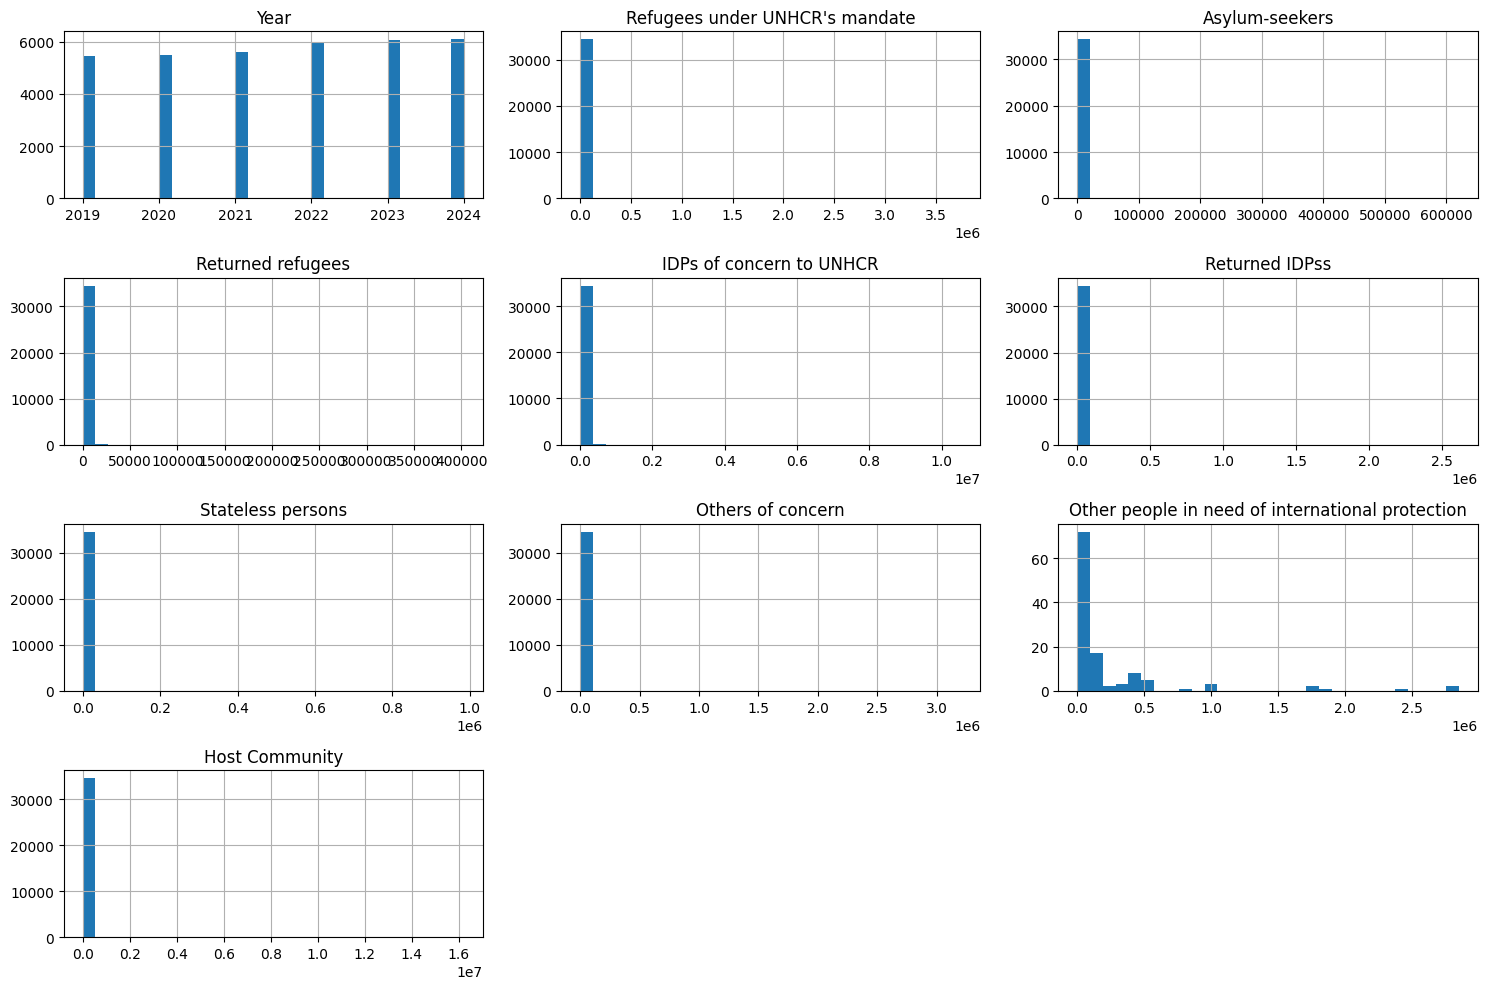

In [ ]:
# Histograms for numeric features
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

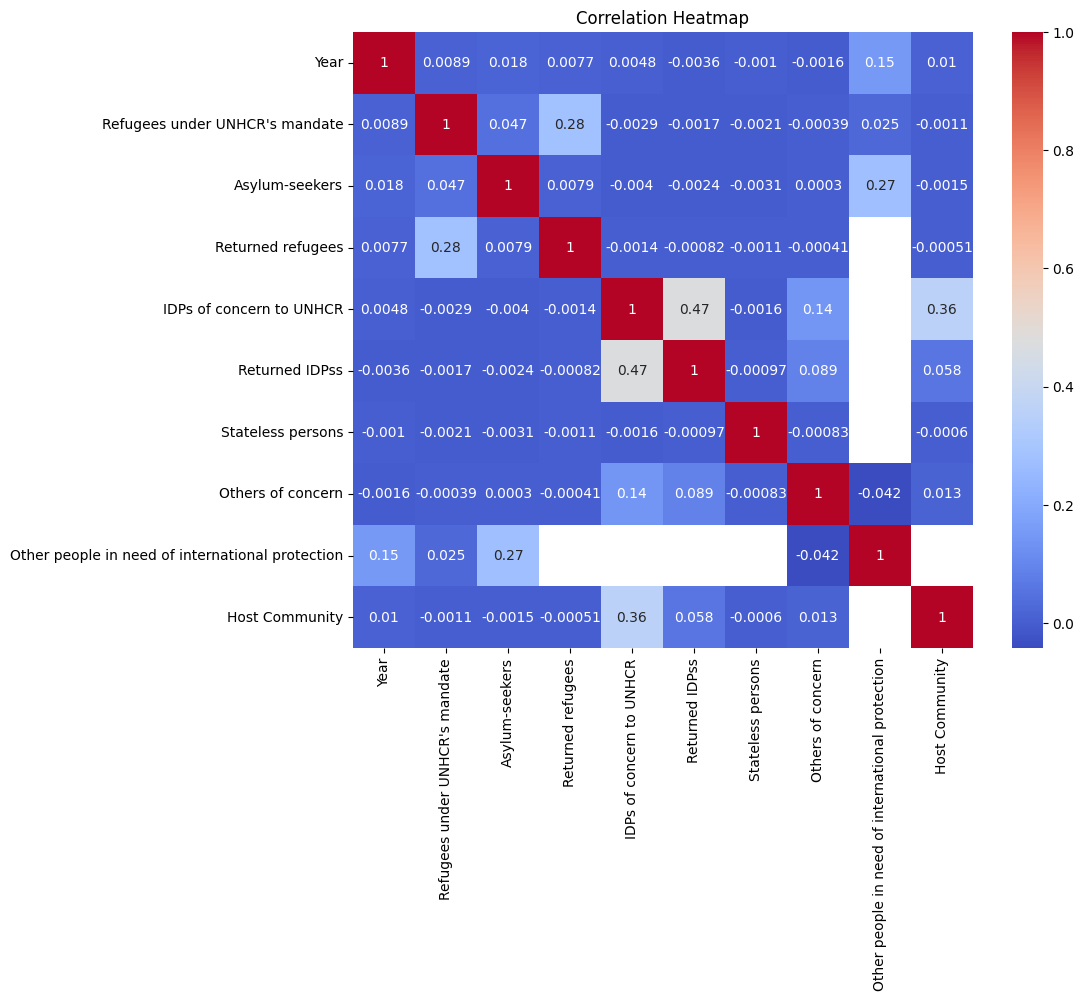

In [ ]:
#Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


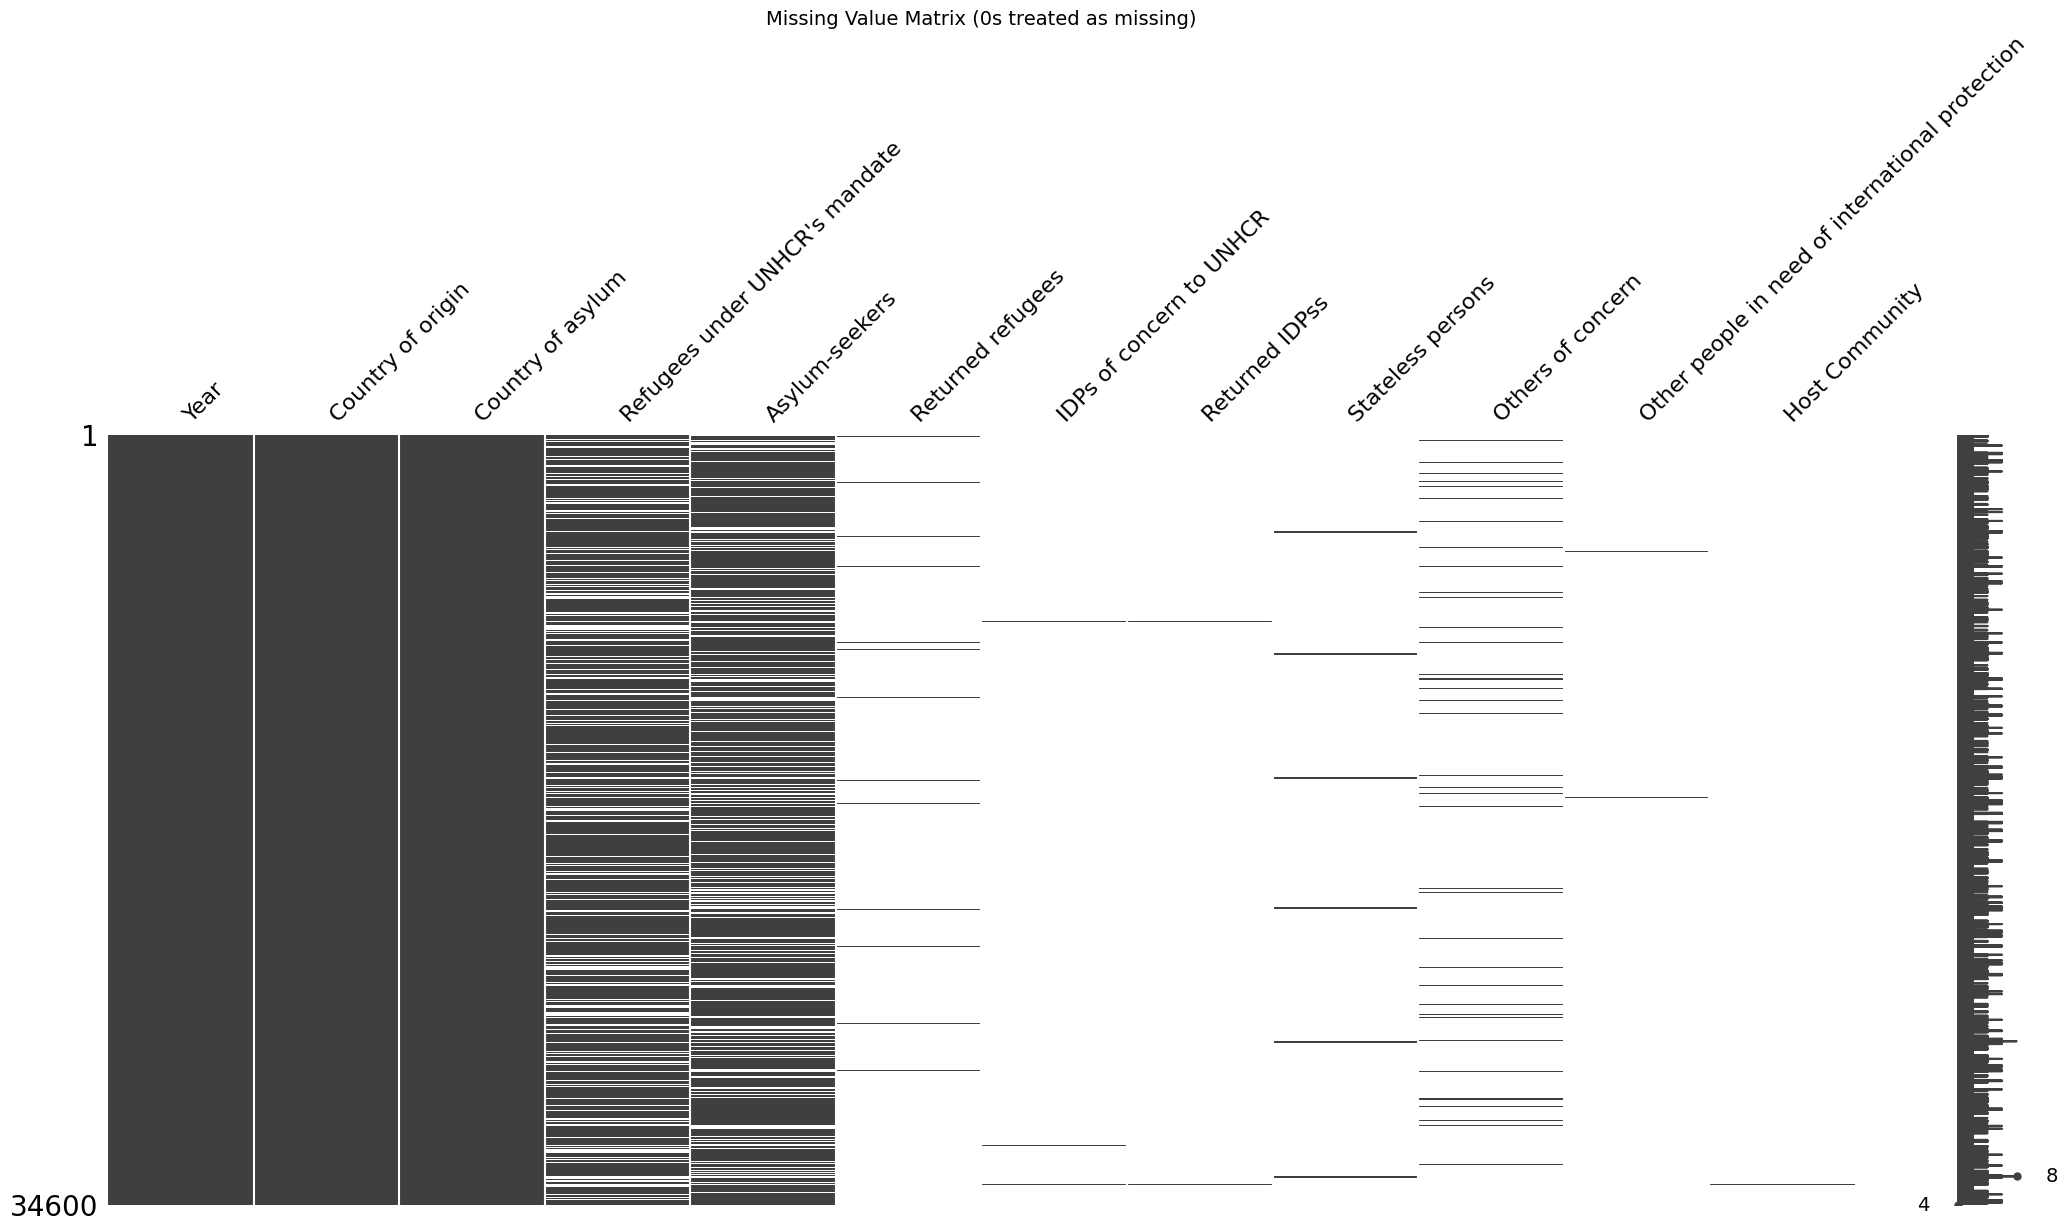

In [ ]:
df_null_visual = df.copy()

numeric_cols = df_null_visual.select_dtypes(include=np.number).columns
df_null_visual[numeric_cols] = df_null_visual[numeric_cols].replace(0, np.nan)
# plotting the missing value
msno.matrix(df_null_visual)
plt.title("Missing Value Matrix (0s treated as missing)", fontsize=14)
plt.show()

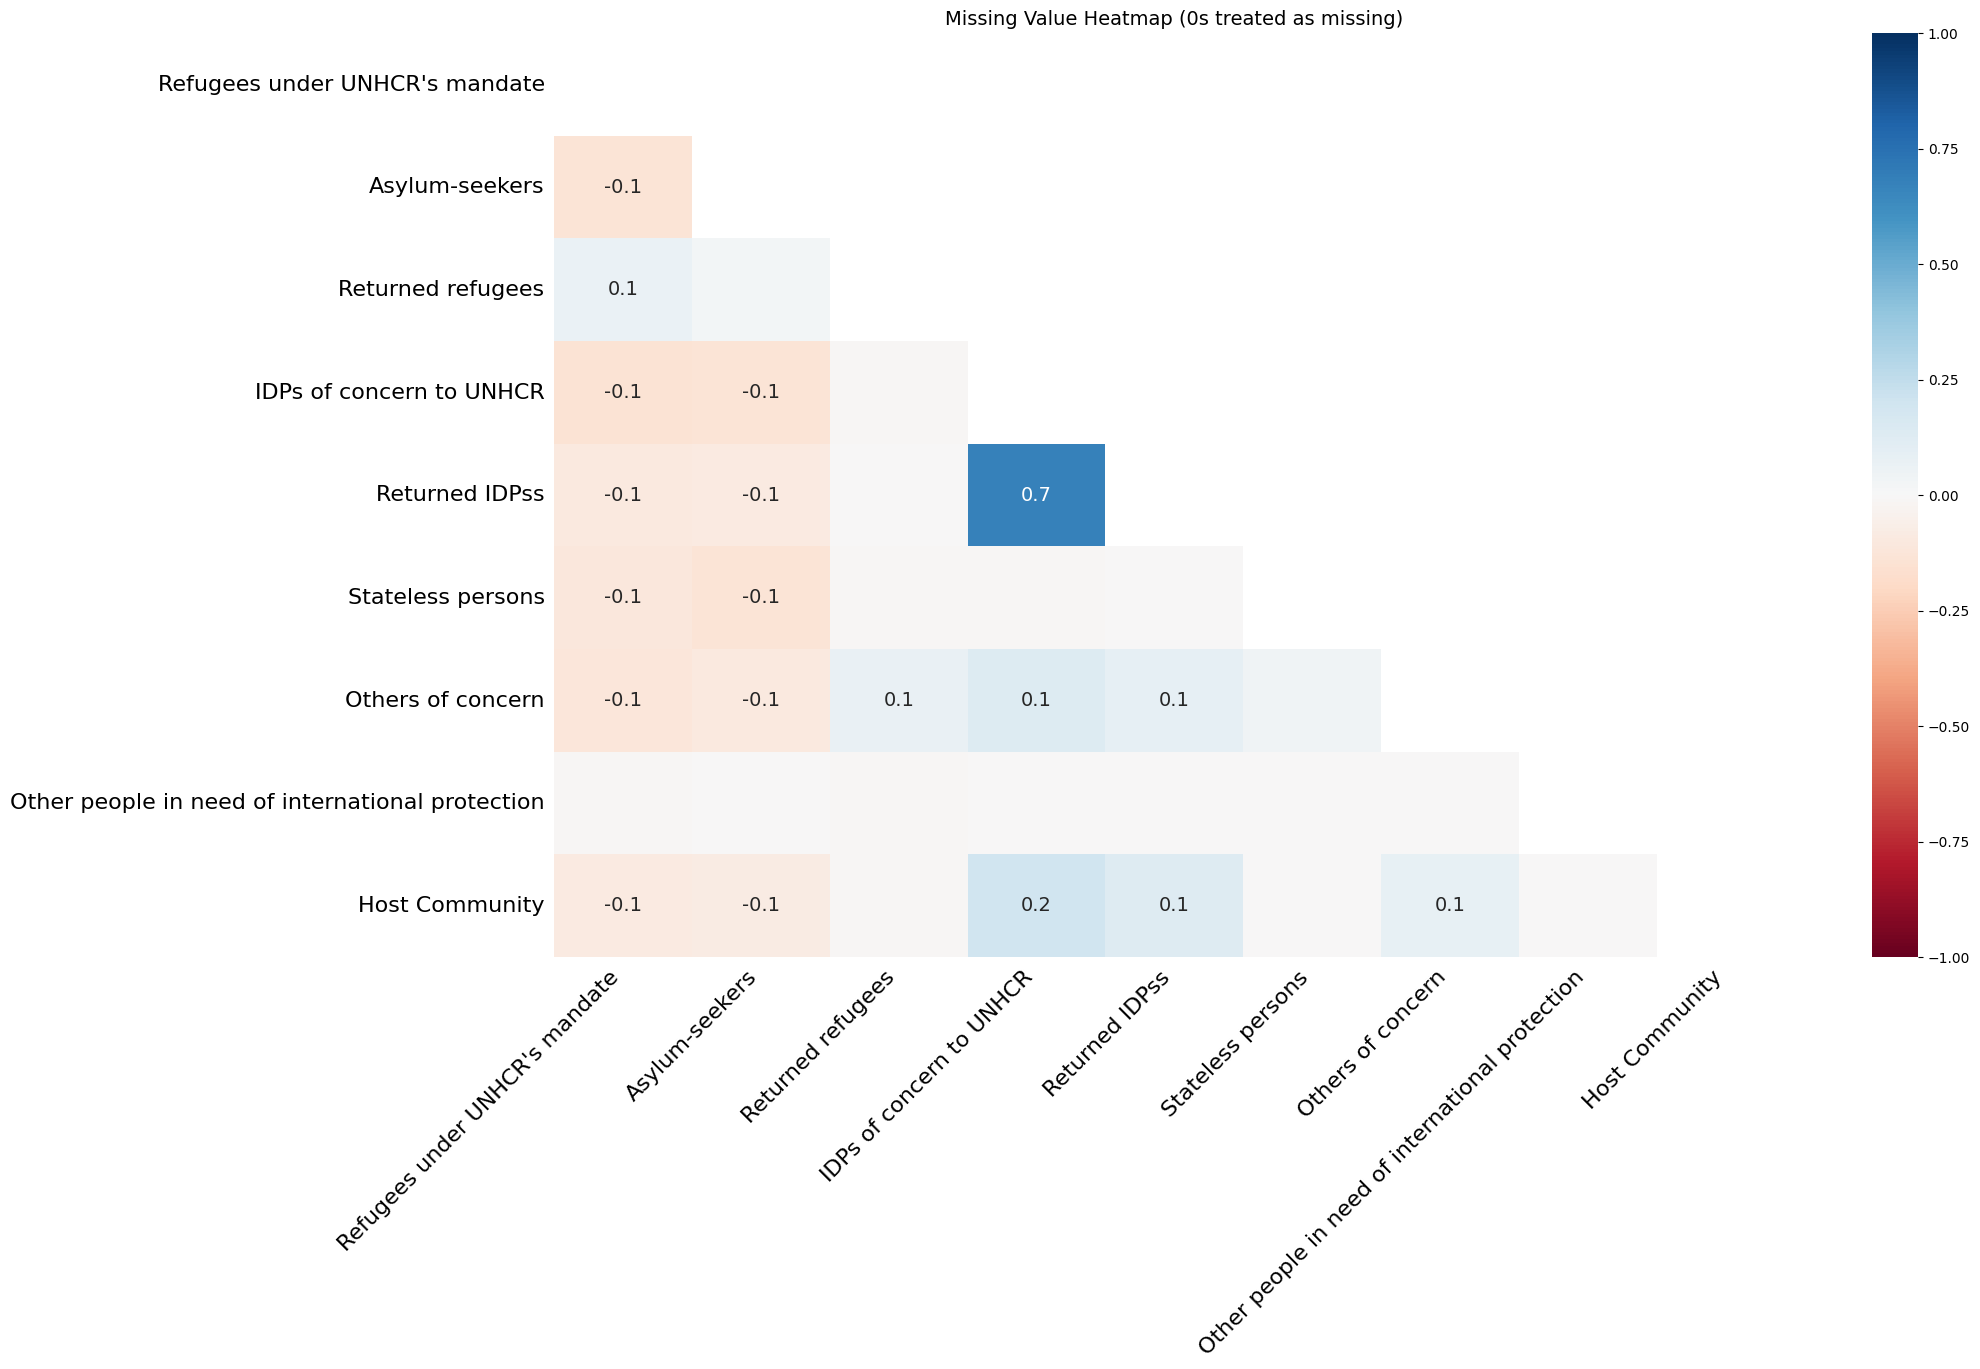

In [ ]:
msno.heatmap(df_null_visual)
plt.title("Missing Value Heatmap (0s treated as missing)", fontsize=14)
plt.show()

In [ ]:
# Replacing 0s with NaN in numeric columns
df_clean = df.copy()
numeric_cols = df_clean.select_dtypes(include=np.number).columns
df_clean[numeric_cols] = df_clean[numeric_cols].replace(0, np.nan)

# Droped columns where more than 50% of the values are NaN
threshold = 0.5
df_clean = df_clean.loc[:, df_clean.isnull().mean() < threshold]

# Filled missing numeric values with median
for col in df_clean.select_dtypes(include=np.number).columns:
    median_val = df_clean[col].median()
    df_clean[col].fillna(median_val, inplace=True)

#Filling missing categorical values with mode
for col in df_clean.select_dtypes(include='object').columns:
    mode_val = df_clean[col].mode()[0]
    df_clean[col].fillna(mode_val, inplace=True)

print("Remaining missing values per column:")
print(df_clean.isnull().sum())


Remaining missing values per column:
Year                              0
Country of origin                 0
Country of asylum                 0
Refugees under UNHCR's mandate    0
Asylum-seekers                    0
dtype: int64


<ipython-input-32-449f65652139>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)
<ipython-input-32-449f65652139>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# Columns dropped due to too many missing values
dropped_columns = set(df.columns) - set(df_clean.columns)
print("Dropped columns due to high missing values:", dropped_columns)


Dropped columns due to high missing values: {'IDPs of concern to UNHCR', 'Others of concern', 'Returned IDPss', 'Stateless persons', 'Returned refugees', 'Host Community', 'Other people in need of international protection'}


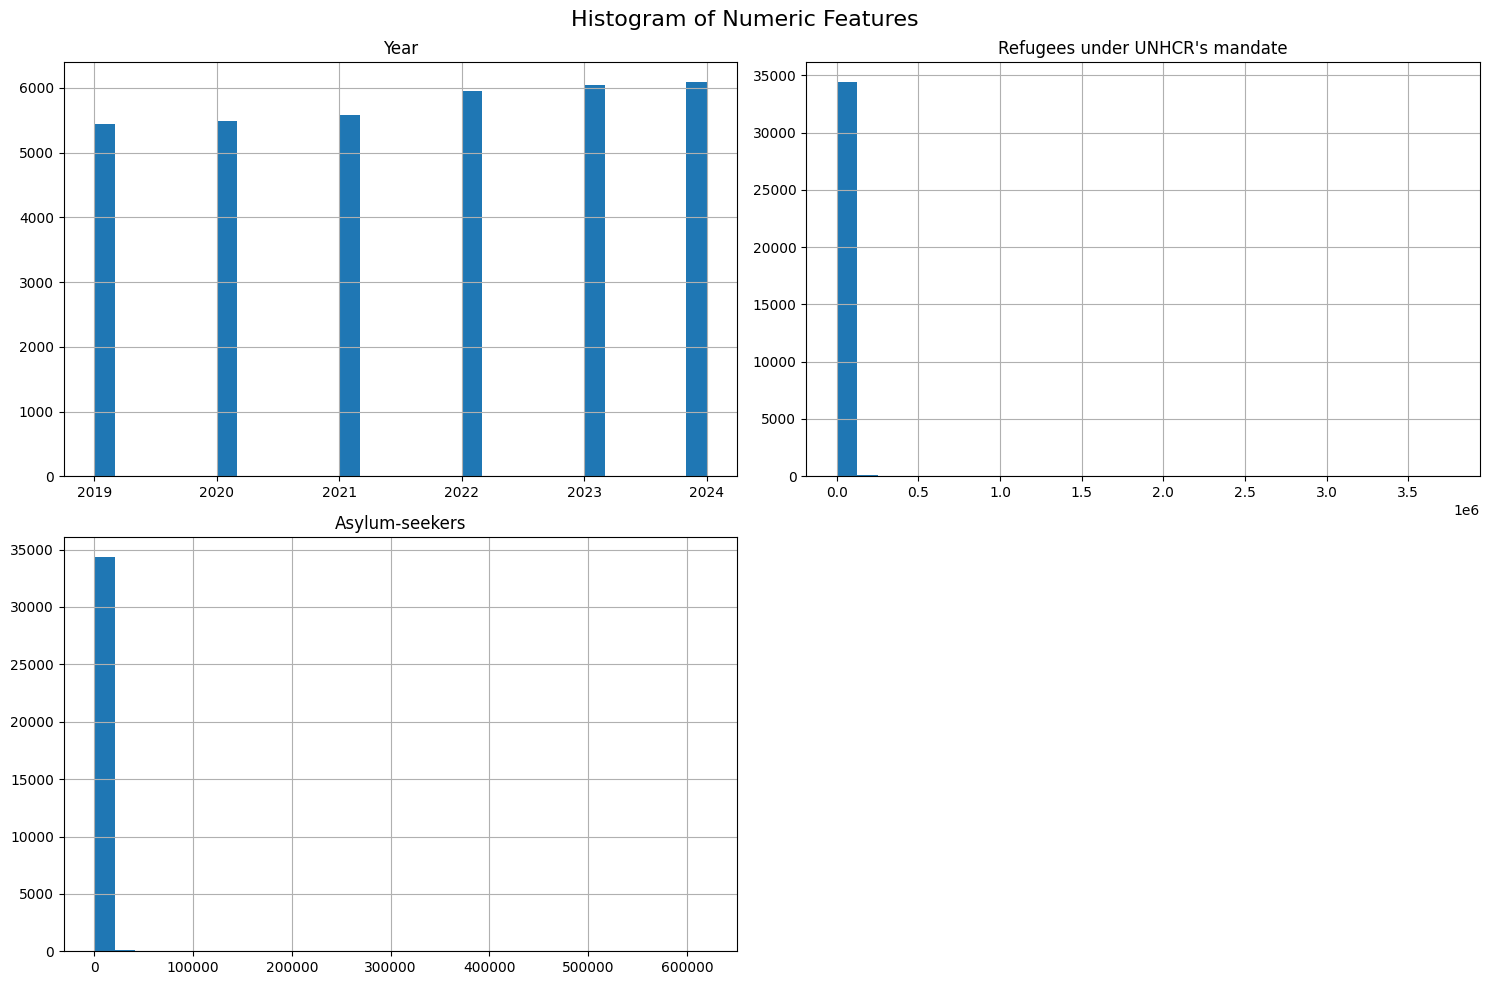

In [ ]:
##Univariate Analysis

# Identify numeric columns
num_cols = df_clean.select_dtypes(include=np.number).columns

# Distribution of Numeric Features
df_clean[num_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Histogram of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


Shape: (34600, 5)

Column Names: ['Year', 'Country of origin', 'Country of asylum', "Refugees under UNHCR's mandate", 'Asylum-seekers']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34600 entries, 0 to 34599
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            34600 non-null  int64  
 1   Country of origin               34600 non-null  object 
 2   Country of asylum               34600 non-null  object 
 3   Refugees under UNHCR's mandate  34600 non-null  float64
 4   Asylum-seekers                  34600 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ MB


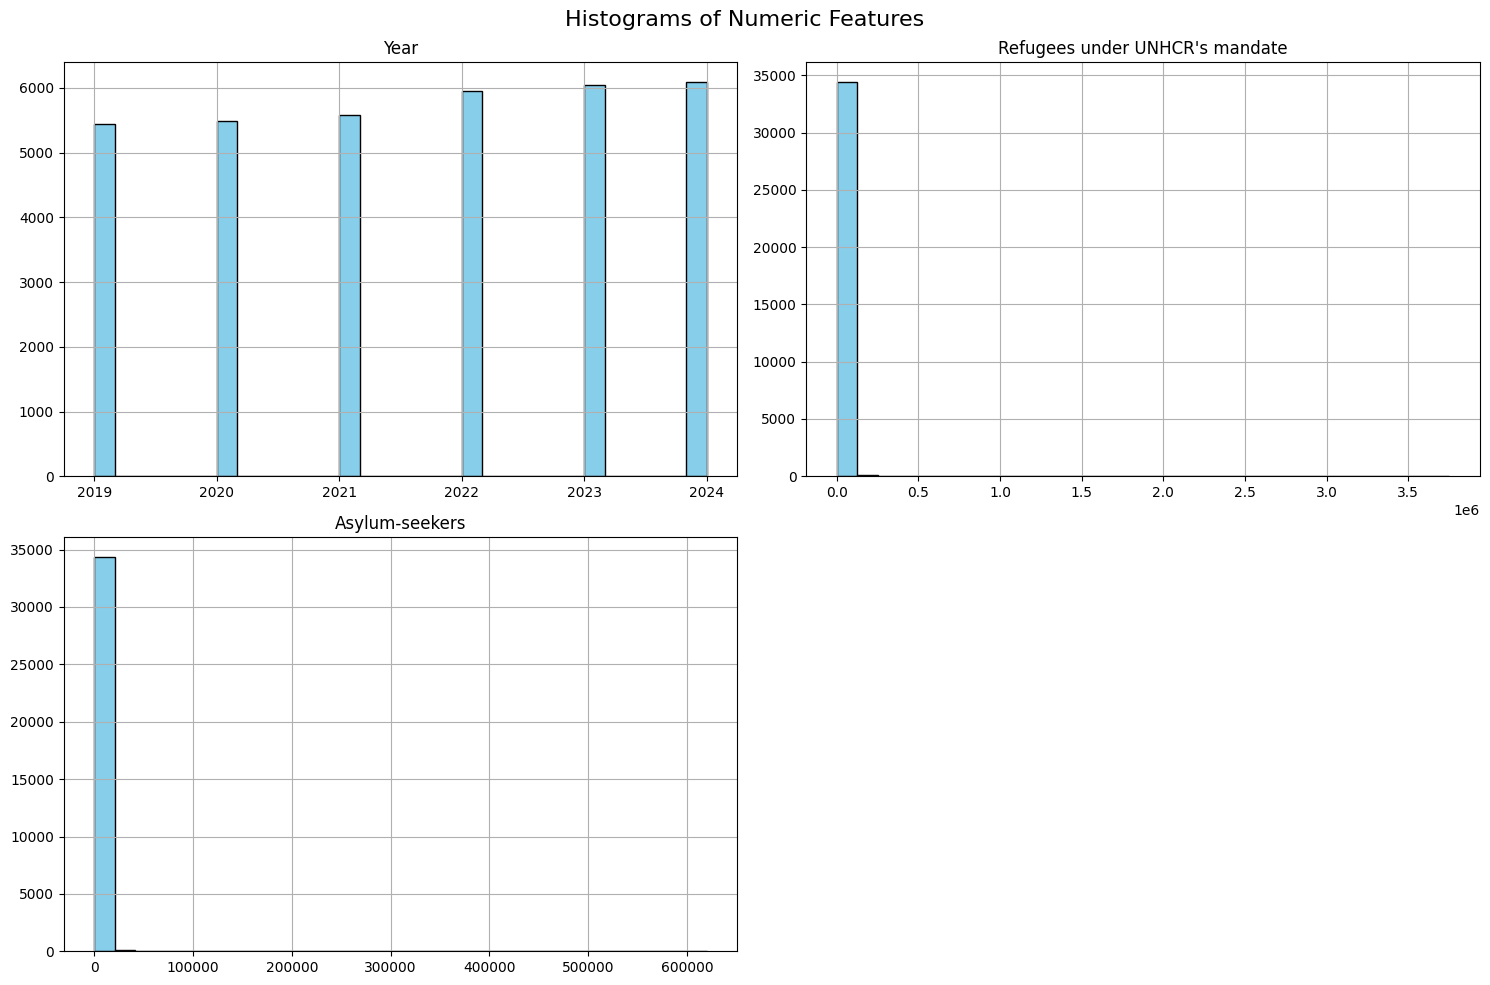

In [ ]:
print("Shape:", df_clean.shape)
print("\nColumn Names:", df_clean.columns.tolist())
df_clean.info()
df_clean.describe(include='all')

# Histogram for numeric values
df_clean.select_dtypes(include='number').hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-36-8e3beee81a33>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette="Set2")


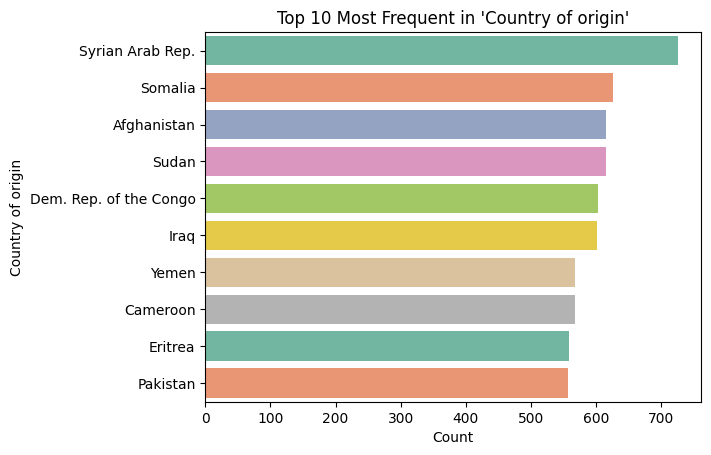

In [ ]:
#Bar Chart for a Categorical Column
cat_col = df_clean.select_dtypes(include='object').columns[0]
top_values = df_clean[cat_col].value_counts().head(10)

sns.barplot(x=top_values.values, y=top_values.index, palette="Set2")
plt.title(f"Top 10 Most Frequent in '{cat_col}'")
plt.xlabel("Count")
plt.ylabel(cat_col)
plt.show()


<ipython-input-37-0766147adffc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x=cat_col, y=num_col, palette="coolwarm")


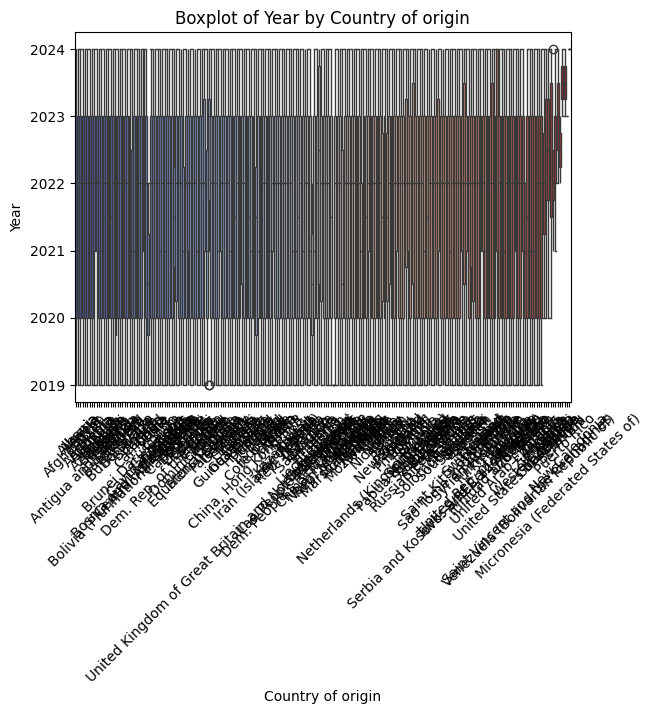

In [ ]:
#Bivariate Analysis
#Boxplot: Categorical vs Numeric

num_col = df_clean.select_dtypes(include='number').columns[0]
sns.boxplot(data=df_clean, x=cat_col, y=num_col, palette="coolwarm")
plt.xticks(rotation=45)
plt.title(f"Boxplot of {num_col} by {cat_col}")
plt.show()


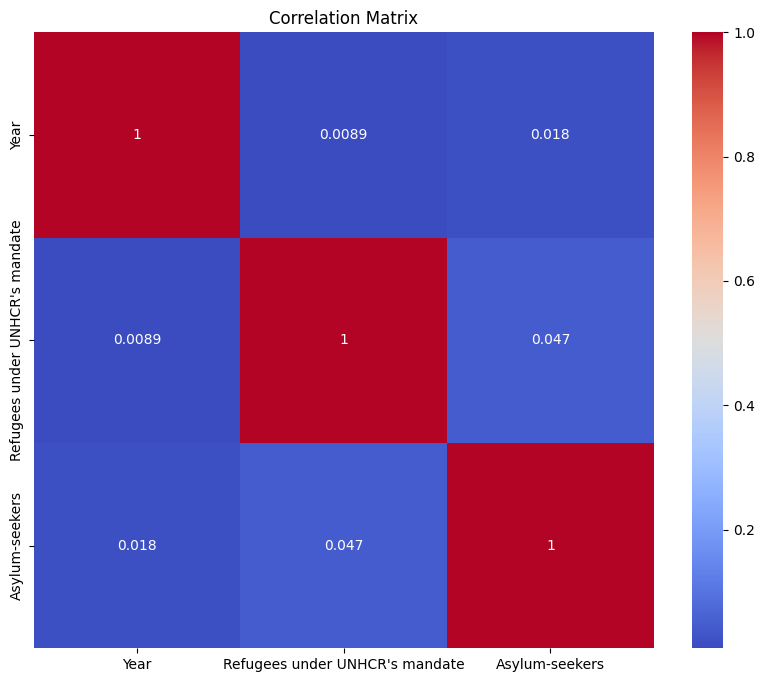

In [ ]:
#Multivariate Analysis
#Correlation Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


<ipython-input-39-e3d3917a75af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_col, y=num_col, data=df_clean, palette="muted")


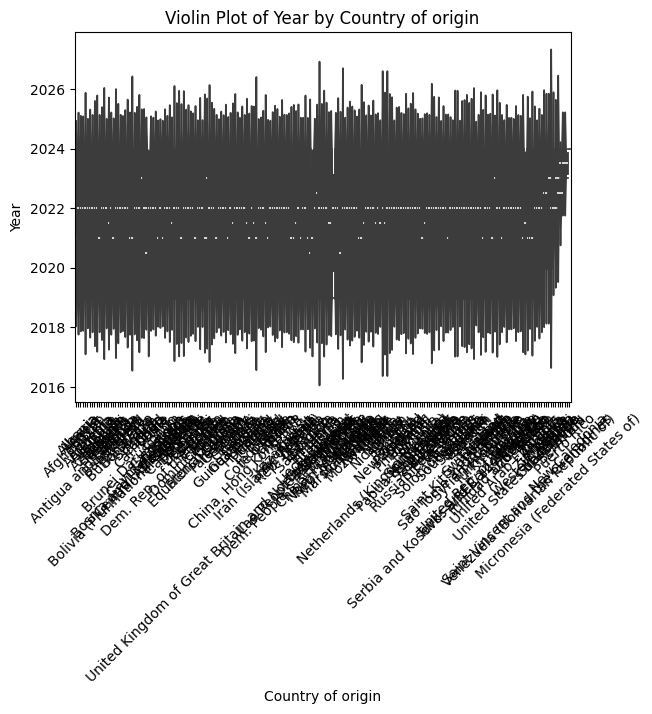

In [ ]:
#Violin Plot
sns.violinplot(x=cat_col, y=num_col, data=df_clean, palette="muted")
plt.xticks(rotation=45)
plt.title(f"Violin Plot of {num_col} by {cat_col}")
plt.show()


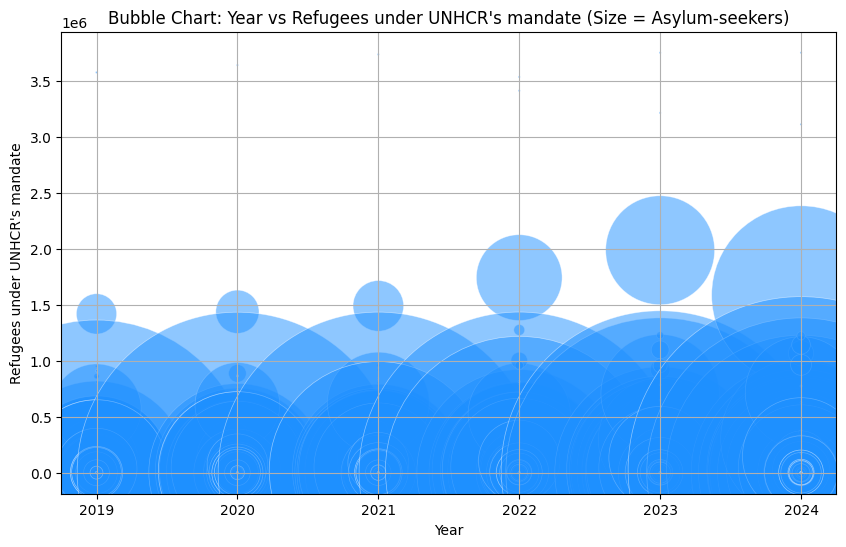

In [ ]:
#Bubble Chart
num_cols = df_clean.select_dtypes(include='number').columns

if len(num_cols) >= 3:
    x = num_cols[0]
    y = num_cols[1]
    size = num_cols[2]

    plt.figure(figsize=(10, 6))
    plt.scatter(df_clean[x], df_clean[y], s=df_clean[size]/10, alpha=0.5,
                c='dodgerblue', edgecolors='white', linewidth=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Bubble Chart: {x} vs {y} (Size = {size})')
    plt.grid(True)
    plt.show()


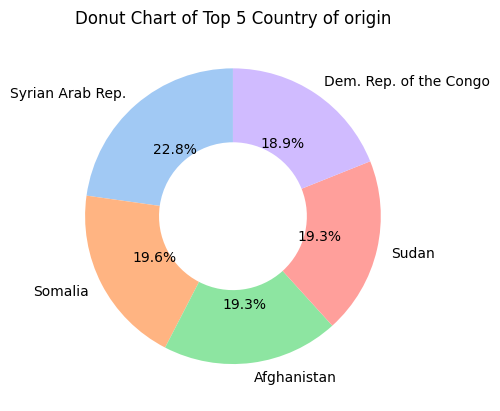

In [ ]:
#Donut Chart
# Pie chart of top 5 categories with a donut style
top5 = df_clean[cat_col].value_counts().head(5)
plt.pie(top5, labels=top5.index, startangle=90, wedgeprops={'width':0.5}, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title(f"Donut Chart of Top 5 {cat_col}")
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("Refugee_Asylum_data.csv")

# South Asian countries
south_asian_countries = [
    "Afghanistan", "Pakistan", "Bangladesh", "India",
    "Nepal", "Sri Lanka", "Bhutan", "Maldives"
]

df_sa = df[df['Country of origin'].isin(south_asian_countries)].copy()

# Droping columns which are more than 50% empty
df_sa = df_sa.drop(columns=['IDPs of concern to UNHCR', 'Others of concern', 'Returned IDPss', 'Stateless persons', 'Returned refugees', 'Host Community', 'Other people in need of international protection'], errors='ignore')

# Renaming
df_sa = df_sa.rename(columns={
    "Country of origin": "Origin",
    "Country of asylum": "Asylum",
    "Refugees under UNHCR's mandate": "Refugees_UNHCR",
    "Asylum-seekers": "AsylumSeekers",
})

df_forecast = df_sa[["Year", "Origin", "Asylum", "Refugees_UNHCR", "AsylumSeekers"]]

df_forecast.head()


Year       Origin       Asylum  Refugees_UNHCR  AsylumSeekers
0  2019  Afghanistan  Afghanistan               0              0
1  2019  Afghanistan        Egypt              28             36
2  2019  Afghanistan    Argentina              12              0
3  2019  Afghanistan      Armenia               5              0
4  2019  Afghanistan    Australia           11585           1710

<ipython-input-60-7ccce785618a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_destinations.values, y=top_destinations.index, palette="viridis")


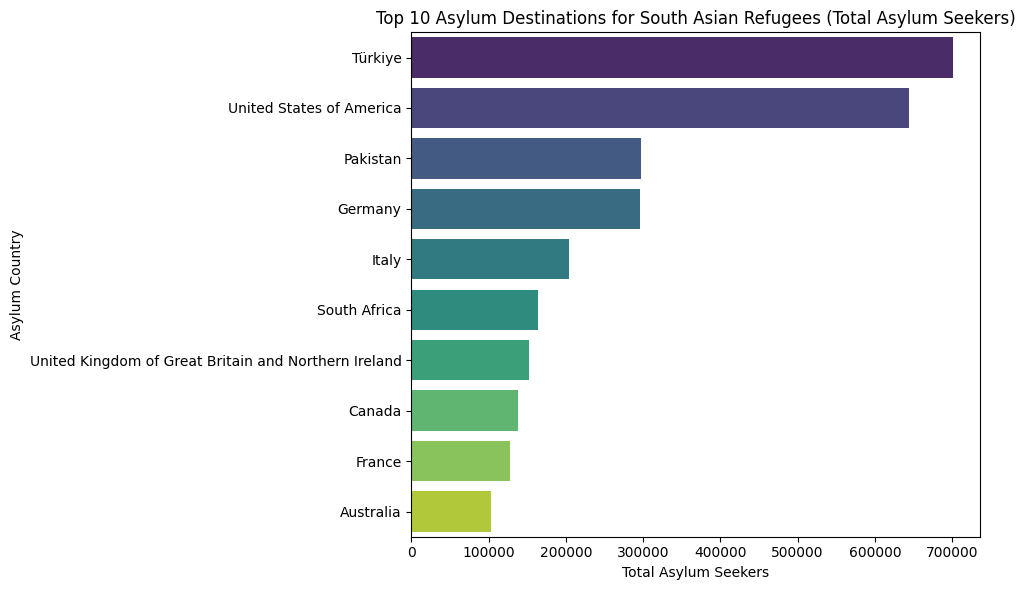

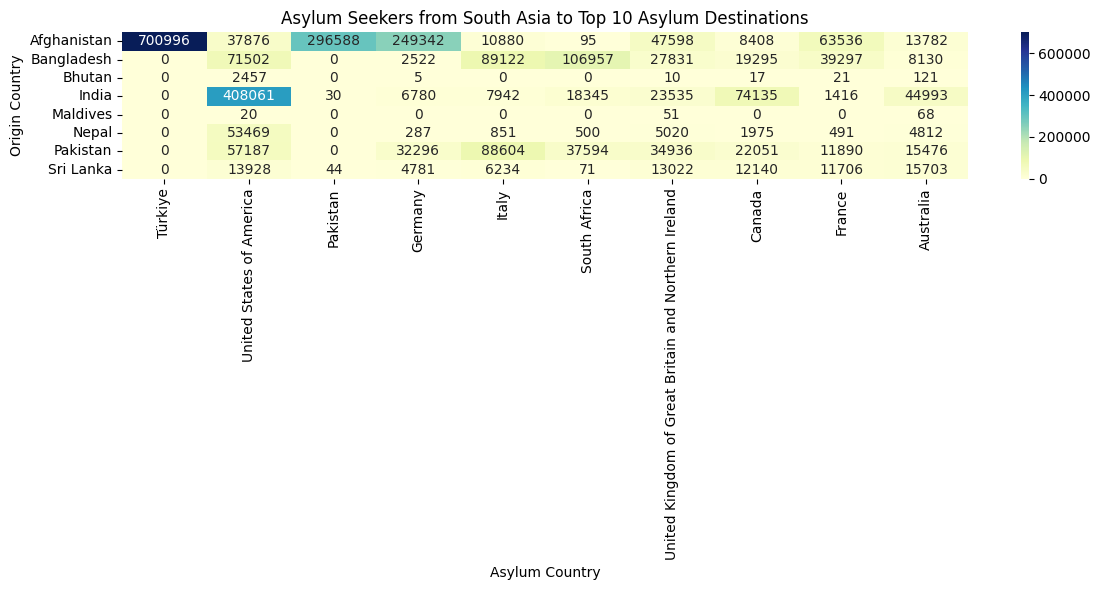

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Show top 10 asylum destinations by total asylum seekers
top_destinations = (
    df_forecast.groupby("Asylum")["AsylumSeekers"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Bar plot of top asylum destinations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_destinations.values, y=top_destinations.index, palette="viridis")
plt.title("Top 10 Asylum Destinations for South Asian Refugees (Total Asylum Seekers)")
plt.xlabel("Total Asylum Seekers")
plt.ylabel("Asylum Country")
plt.tight_layout()
plt.show()

# Heatmap of asylum seekers by Origin-Asylum pair
pivot_table = df_forecast.pivot_table(
    index="Origin", columns="Asylum", values="AsylumSeekers", aggfunc="sum", fill_value=0
)

# only top 10 asylum countries in heatmap
top_asylum_countries = top_destinations.index.tolist()
heatmap_data = pivot_table[top_asylum_countries]

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="g")
plt.title("Asylum Seekers from South Asia to Top 10 Asylum Destinations")
plt.xlabel("Asylum Country")
plt.ylabel("Origin Country")
plt.tight_layout()
plt.show()


<ipython-input-3-c9e6cde0cbd8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_destinations.values, y=top_destinations.index, palette="viridis")


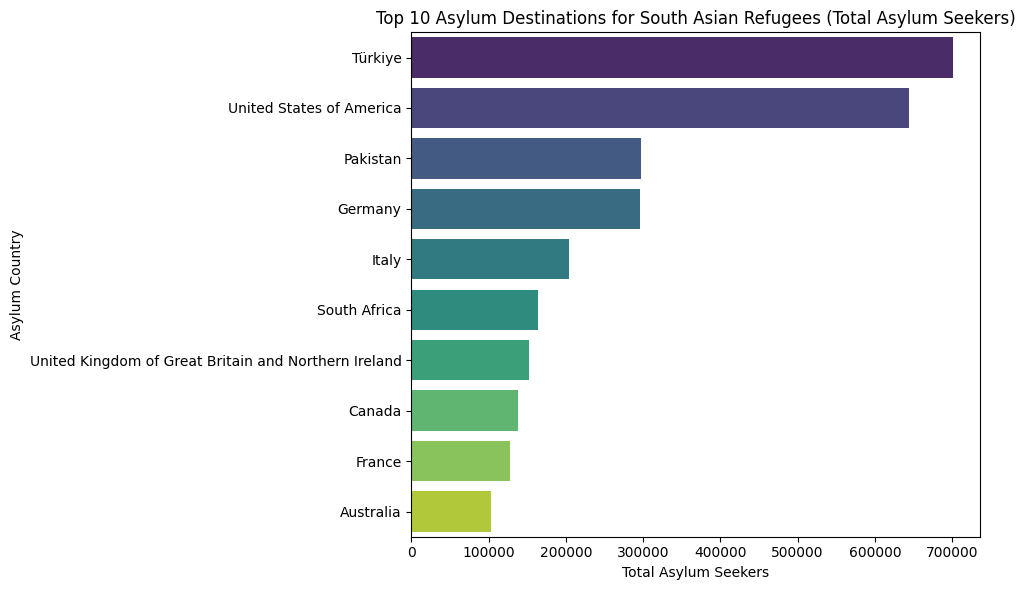

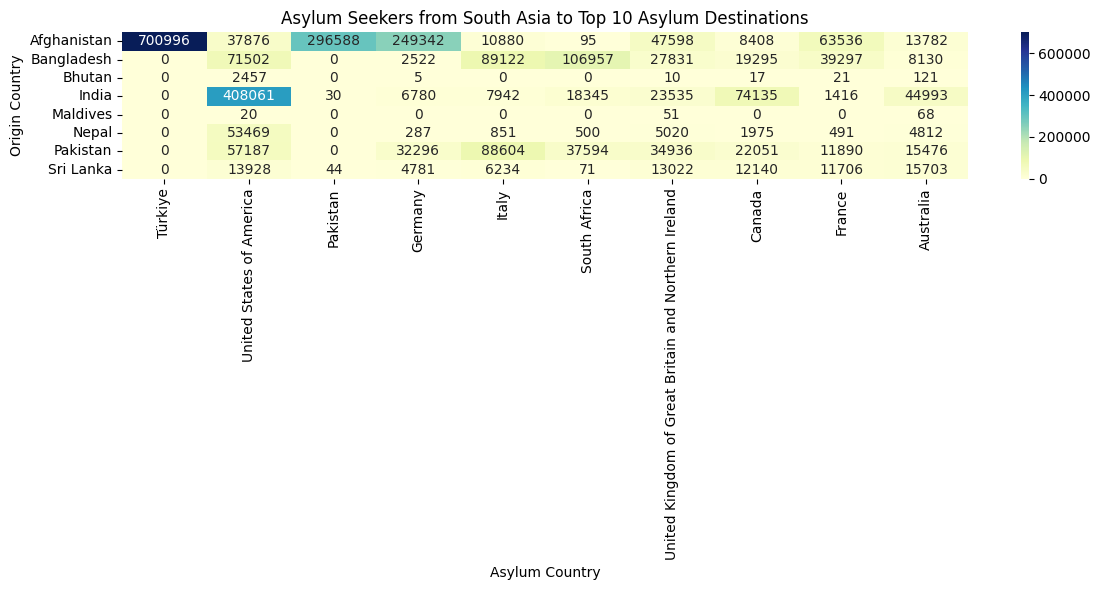


Total Number of Asylum Seekers from Each South Asian Country
     Origin  AsylumSeekers
Afghanistan        1716251
      India         639855
 Bangladesh         426246
   Pakistan         392980
  Sri Lanka         100616
      Nepal          81976
     Bhutan           2769
   Maldives            139


<ipython-input-3-c9e6cde0cbd8>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AsylumSeekers", y="Origin", data=total_asylum_by_origin, palette="viridis")


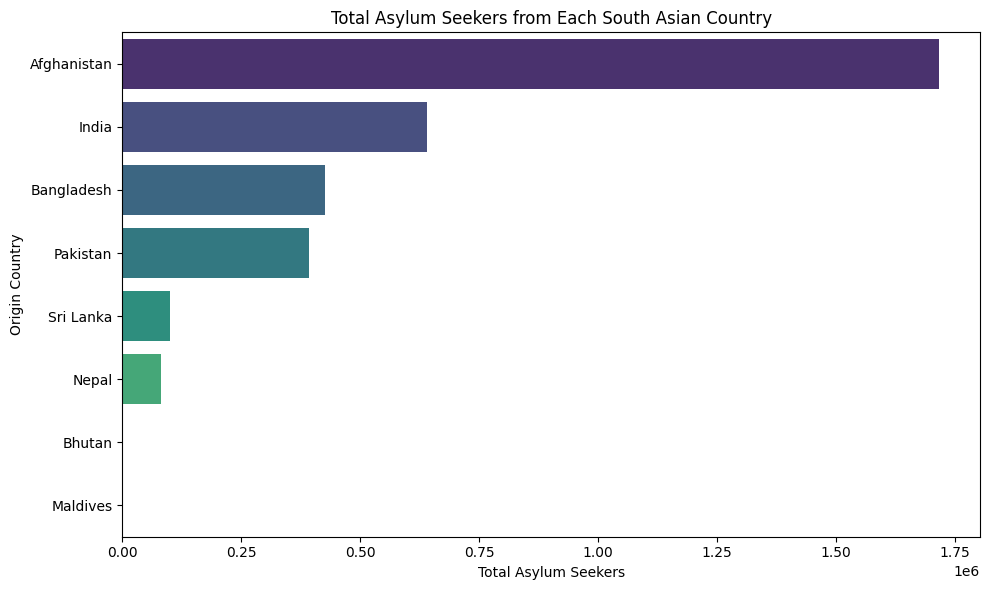

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_forecast is already defined from your notebook
# Show top 10 asylum destinations by total asylum seekers
top_destinations = (
    df_forecast.groupby("Asylum")["AsylumSeekers"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Bar plot of top asylum destinations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_destinations.values, y=top_destinations.index, palette="viridis")
plt.title("Top 10 Asylum Destinations for South Asian Refugees (Total Asylum Seekers)")
plt.xlabel("Total Asylum Seekers")
plt.ylabel("Asylum Country")
plt.tight_layout()
plt.show()

# Heatmap of asylum seekers by Origin-Asylum pair
pivot_table = df_forecast.pivot_table(
    index="Origin", columns="Asylum", values="AsylumSeekers", aggfunc="sum", fill_value=0
)

# Only top 10 asylum countries in heatmap
top_asylum_countries = top_destinations.index.tolist()
heatmap_data = pivot_table[top_asylum_countries]

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="g")
plt.title("Asylum Seekers from South Asia to Top 10 Asylum Destinations")
plt.xlabel("Asylum Country")
plt.ylabel("Origin Country")
plt.tight_layout()
plt.show()

# Total number of asylum seekers from each South Asian country
total_asylum_by_origin = (
    df_forecast.groupby("Origin")["AsylumSeekers"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Display as a table
print("\nTotal Number of Asylum Seekers from Each South Asian Country")
print(total_asylum_by_origin.to_string(index=False))

# Bar plot of total asylum seekers by origin
plt.figure(figsize=(10, 6))
sns.barplot(x="AsylumSeekers", y="Origin", data=total_asylum_by_origin, palette="viridis")
plt.title("Total Asylum Seekers from Each South Asian Country")
plt.xlabel("Total Asylum Seekers")
plt.ylabel("Origin Country")
plt.tight_layout()
plt.show()

In [ ]:
# Aggregating asylum seekers by year, origin, and destination
agg_df = (
    df_forecast.groupby(['Year', 'Origin', 'Asylum'])['AsylumSeekers']
    .sum()
    .reset_index()
)

# For each (Year, Origin) pair, choosing the asylum country with the max seekers
agg_df_sorted = agg_df.sort_values(['Year', 'Origin', 'AsylumSeekers'], ascending=[True, True, False])
top_destinations_df = agg_df_sorted.drop_duplicates(subset=['Year', 'Origin'], keep='first')

# Encoding categorical columns
from sklearn.preprocessing import LabelEncoder

le_origin = LabelEncoder()
le_asylum = LabelEncoder()

top_destinations_df['Origin_encoded'] = le_origin.fit_transform(top_destinations_df['Origin'])
top_destinations_df['Asylum_encoded'] = le_asylum.fit_transform(top_destinations_df['Asylum'])

# Preparing features (X) and target (y)
X = top_destinations_df[['Year', 'Origin_encoded']]
y = top_destinations_df['Asylum_encoded']


<ipython-input-61-529ddc546c57>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_destinations_df['Origin_encoded'] = le_origin.fit_transform(top_destinations_df['Origin'])
<ipython-input-61-529ddc546c57>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_destinations_df['Asylum_encoded'] = le_asylum.fit_transform(top_destinations_df['Asylum'])


In [ ]:
## XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder



# Droping asylum destinations with <2 samples
asylum_counts = top_destinations_df['Asylum'].value_counts()
valid_asylums = asylum_counts[asylum_counts >= 2].index
top_destinations_df = top_destinations_df[top_destinations_df['Asylum'].isin(valid_asylums)].copy()

# Encoding after filtering
le_origin = LabelEncoder()
le_asylum = LabelEncoder()

top_destinations_df.loc[:, 'Origin_encoded'] = le_origin.fit_transform(top_destinations_df['Origin'])
top_destinations_df.loc[:, 'Asylum_encoded'] = le_asylum.fit_transform(top_destinations_df['Asylum'])

# Train/test split
X = top_destinations_df[['Year', 'Origin_encoded']]
y = top_destinations_df['Asylum_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ensuring matching labels in train/test
train_classes = set(y_train.unique())
test_classes = set(y_test.unique())
common_classes = train_classes & test_classes

train_mask = y_train.isin(common_classes)
test_mask = y_test.isin(common_classes)

X_train_filtered = X_train[train_mask]
y_train_filtered = y_train[train_mask]
X_test_filtered = X_test[test_mask]
y_test_filtered = y_test[test_mask]

# model train
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_filtered, y_train_filtered)

# Prediction
y_pred = model.predict(X_test_filtered)
print("Accuracy:", accuracy_score(y_test_filtered, y_pred))
print("\n Classification Report:\n", classification_report(
    y_test_filtered,
    y_pred,
    target_names=le_asylum.inverse_transform(sorted(common_classes))
))


Accuracy: 0.6428571428571429

 Classification Report:
                                                       precision    recall  f1-score   support

                                           Australia       1.00      1.00      1.00         2
                                               Italy       0.20      1.00      0.33         1
                                        South Africa       0.00      0.00      0.00         1
                                             Türkiye       0.00      0.00      0.00         3
United Kingdom of Great Britain and Northern Ireland       0.00      0.00      0.00         1
                            United States of America       1.00      1.00      1.00         6

                                            accuracy                           0.64        14
                                           macro avg       0.37      0.50      0.39        14
                                        weighted avg       0.59      0.64      0.60        14



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

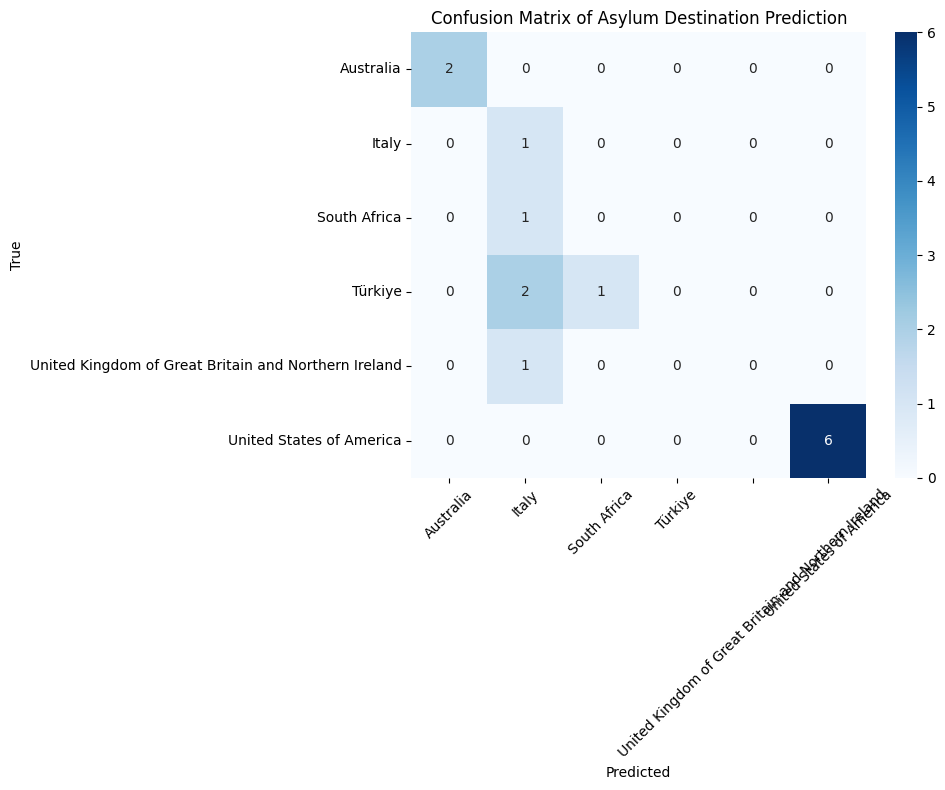

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Computing confusion matrix
cm = confusion_matrix(y_test_filtered, y_pred, labels=sorted(common_classes))

# Converting encoded labels back to country names
labels = le_asylum.inverse_transform(sorted(common_classes))

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Asylum Destination Prediction')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcud4q_4/jscwfjgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcud4q_4/egokinmm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50175', 'data', 'file=/tmp/tmpwcud4q_4/jscwfjgo.json', 'init=/tmp/tmpwcud4q_4/egokinmm.json', 'output', 'file=/tmp/tmpwcud4q_4/prophet_modelxh_2df0i/prophet_model-20250510130754.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:07:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

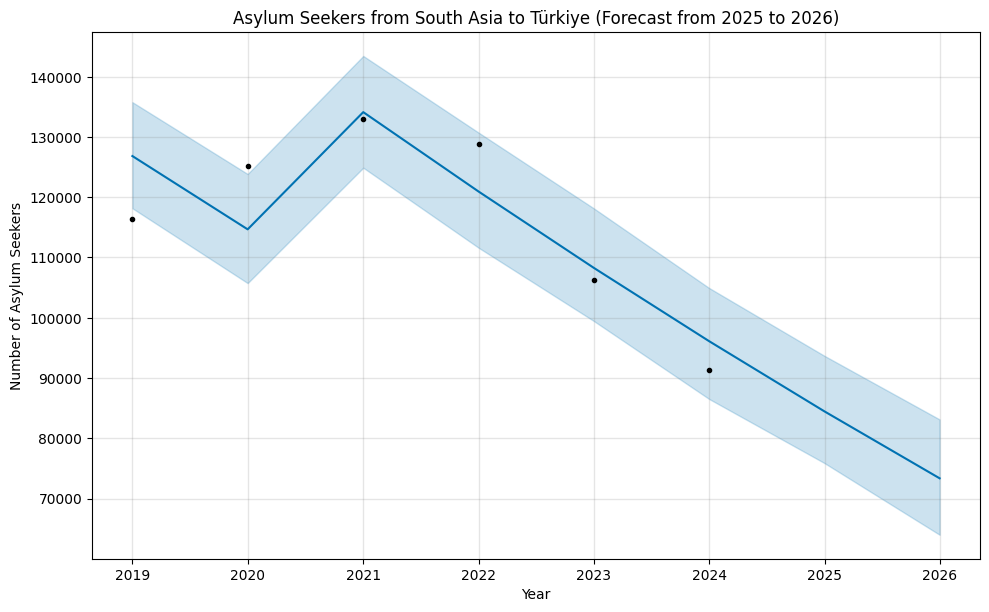

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcud4q_4/f748sphx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcud4q_4/61x6isiq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1957', 'data', 'file=/tmp/tmpwcud4q_4/f748sphx.json', 'init=/tmp/tmpwcud4q_4/61x6isiq.json', 'output', 'file=/tmp/tmpwcud4q_4/prophet_modelh3lsmjra/prophet_model-20250510130755.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:07:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

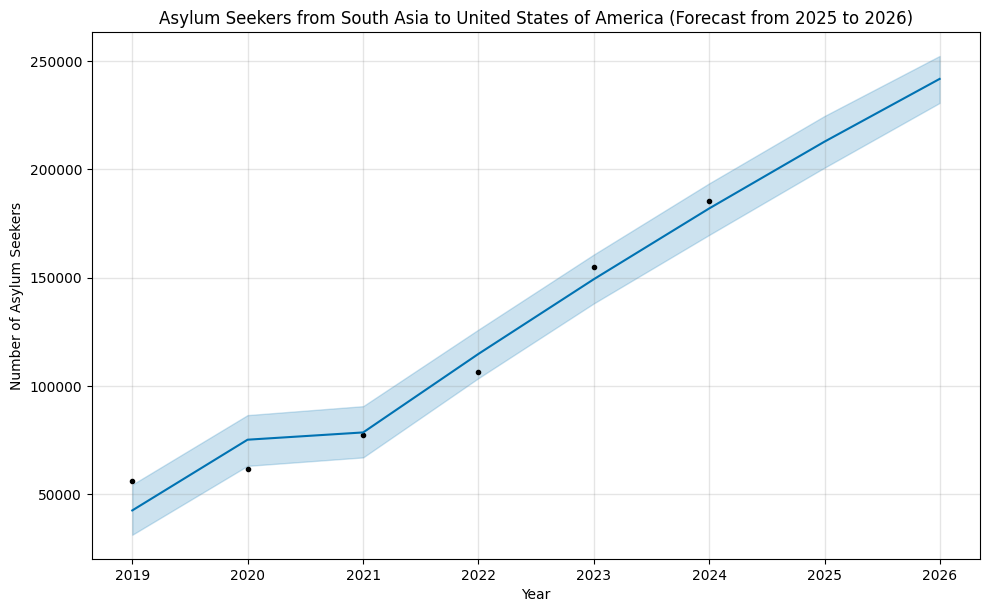

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcud4q_4/brrg6ovj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcud4q_4/zsecncjc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8187', 'data', 'file=/tmp/tmpwcud4q_4/brrg6ovj.json', 'init=/tmp/tmpwcud4q_4/zsecncjc.json', 'output', 'file=/tmp/tmpwcud4q_4/prophet_modelwshzl5vz/prophet_model-20250510130755.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:07:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

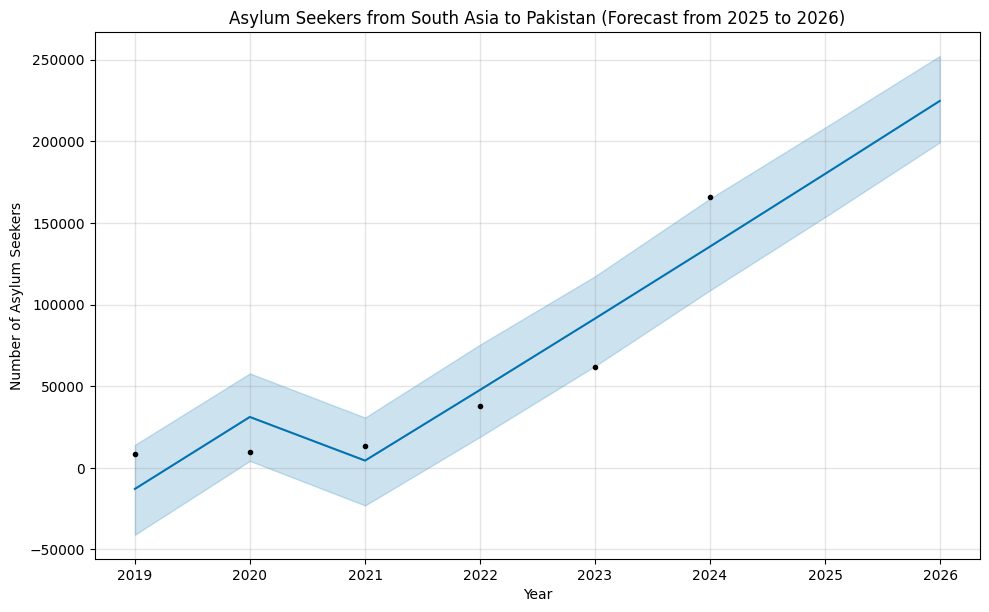

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcud4q_4/d9w3hd5j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcud4q_4/4n6dzqpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13643', 'data', 'file=/tmp/tmpwcud4q_4/d9w3hd5j.json', 'init=/tmp/tmpwcud4q_4/4n6dzqpl.json', 'output', 'file=/tmp/tmpwcud4q_4/prophet_modely95l3akt/prophet_model-20250510130755.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:07:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

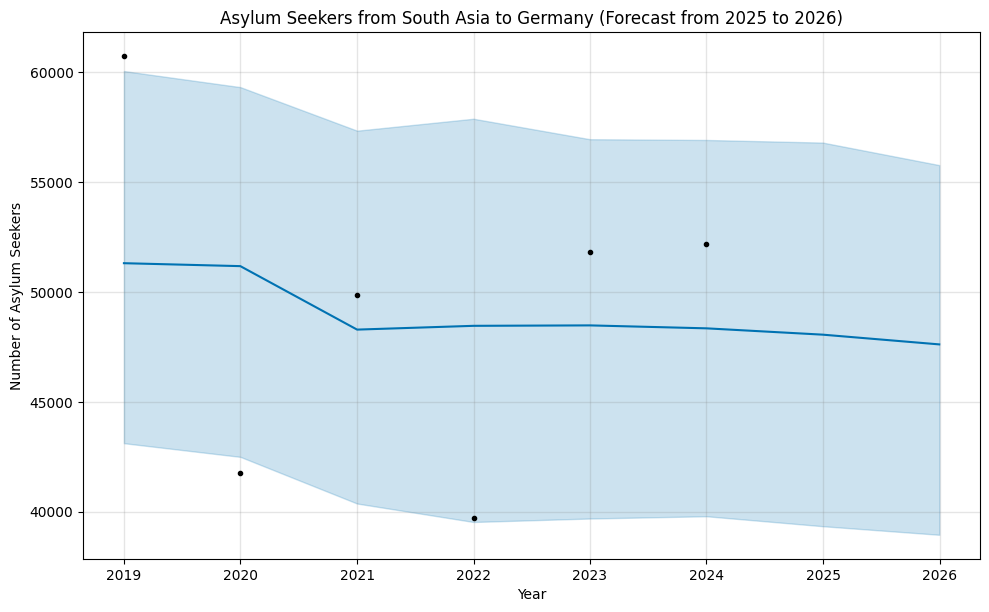

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcud4q_4/l62xael9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcud4q_4/p8_a3bg5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29208', 'data', 'file=/tmp/tmpwcud4q_4/l62xael9.json', 'init=/tmp/tmpwcud4q_4/p8_a3bg5.json', 'output', 'file=/tmp/tmpwcud4q_4/prophet_modeldtd4og2b/prophet_model-20250510130756.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:07:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

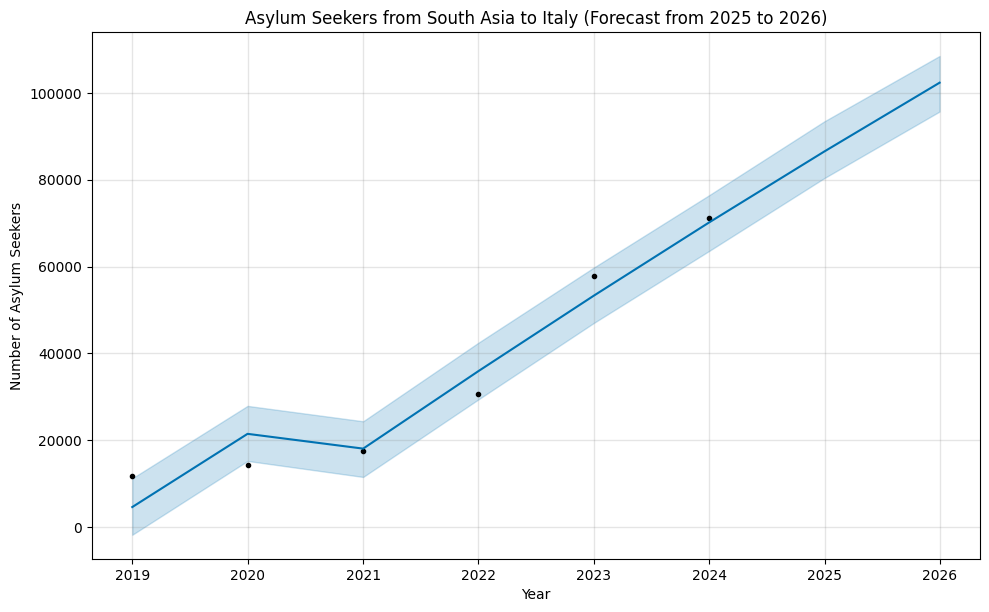

In [ ]:
#Prophet
!pip install prophet --quiet

from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Filter for South Asian origin countries
south_asian_countries = ['India', 'Pakistan', 'Bangladesh', 'Nepal', 'Sri Lanka', 'Afghanistan']
df_south_asia = df_forecast[df_forecast['Origin'].isin(south_asian_countries)].copy()

# Aggregate asylum seekers by year and asylum country
df_grouped = df_south_asia.groupby(['Year', 'Asylum'])['AsylumSeekers'].sum().reset_index()

# Forecast for top N destination countries (by total asylum seekers)
top_destinations = df_grouped.groupby('Asylum')['AsylumSeekers'].sum().sort_values(ascending=False).head(5).index

# Forecast each top destination using Prophet
for country in top_destinations:
    df_country = df_grouped[df_grouped['Asylum'] == country][['Year', 'AsylumSeekers']].copy()
    df_country = df_country.rename(columns={'Year': 'ds', 'AsylumSeekers': 'y'})
    df_country['ds'] = pd.to_datetime(df_country['ds'], format='%Y')

    # Fit Prophet
    model = Prophet(yearly_seasonality=True)
    model.fit(df_country)

    # Forecast to 2026
    future = model.make_future_dataframe(periods=2, freq='Y')
    forecast = model.predict(future)

    # Plot forecast
    fig = model.plot(forecast)
    plt.title(f"Asylum Seekers from South Asia to {country} (Forecast from 2025 to 2026)")
    plt.xlabel("Year")
    plt.ylabel("Number of Asylum Seekers")
    plt.show()


In [ ]:
from prophet import Prophet
import pandas as pd

forecast_table = pd.DataFrame()

for country in top_destinations:
    df_country = df_grouped[df_grouped['Asylum'] == country][['Year', 'AsylumSeekers']].copy()
    df_country = df_country.rename(columns={'Year': 'ds', 'AsylumSeekers': 'y'})
    df_country['ds'] = pd.to_datetime(df_country['ds'], format='%Y')

    # Train model
    model = Prophet(yearly_seasonality=True)
    model.fit(df_country)

    # Ensure forecast includes 2025 and 2026
    future = pd.date_range(start='2023-01-01', end='2026-12-31', freq='Y')
    future = pd.DataFrame({'ds': future})

    forecast = model.predict(future)
    forecast_filtered = forecast[forecast['ds'].dt.year.isin([2025, 2026])]
    values = forecast_filtered[['ds', 'yhat']].copy()
    values['Asylum'] = country

    forecast_table = pd.concat([forecast_table, values], ignore_index=True)

# Format results
forecast_table['Year'] = forecast_table['ds'].dt.year
forecast_summary = forecast_table.pivot(index='Asylum', columns='Year', values='yhat').round().astype(int)

# Rename columns only if both years are present
if set([2025, 2026]).issubset(forecast_summary.columns):
    forecast_summary.columns = ['2025 Forecast', '2026 Forecast']
else:
    print("One of the forecast years is missing in the results.")

display(forecast_summary)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcud4q_4/frq8ozbn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcud4q_4/wj8fuap_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1325', 'data', 'file=/tmp/tmpwcud4q_4/frq8ozbn.json', 'init=/tmp/tmpwcud4q_4/wj8fuap_.json', 'output', 'file=/tmp/tmpwcud4q_4/prophet_model9oaf2j7u/prophet_model-20250510130844.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:08:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

2025 Forecast  2026 Forecast
Asylum                                                
Germany                           47607          47009
Italy                            102304         117620
Pakistan                         224710         269821
Türkiye                           73355          62770
United States of America         241701         268889

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Filter for South Asian countries
south_asian_countries = ['Afghanistan', 'Bangladesh', 'India', 'Nepal', 'Pakistan', 'Sri Lanka']
df_filtered = df[df['Country of origin'].isin(south_asian_countries)]

# Group by Year, Origin, Asylum Country
df_grouped = df_filtered.groupby(['Year', 'Country of origin', 'Country of asylum'])['Asylum-seekers'].sum().reset_index()

# Forecast for each South Asian origin country
forecast_results = []

for country in south_asian_countries:
    country_df = df_grouped[df_grouped['Country of origin'] == country]
    asylum_destinations = country_df['Country of asylum'].unique()

    for asylum_country in asylum_destinations:
        sub_df = country_df[country_df['Country of asylum'] == asylum_country]

        if len(sub_df) >= 3:
            prophet_df = sub_df[['Year', 'Asylum-seekers']].rename(columns={'Year': 'ds', 'Asylum-seekers': 'y'})
            prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

            model = Prophet(yearly_seasonality=True)
            model.fit(prophet_df)

            future = model.make_future_dataframe(periods=2, freq='Y')
            forecast = model.predict(future)

            forecast['Country of Origin'] = country
            forecast['Country of Asylum'] = asylum_country
            forecast_results.append(forecast[['ds', 'yhat', 'Country of Origin', 'Country of Asylum']])

# Combine all forecasts
all_forecasts_df = pd.concat(forecast_results)

# Extract only 2025 and 2026 predictions
forecast_2025_2026 = all_forecasts_df[all_forecasts_df['ds'].dt.year.isin([2025, 2026])]
forecast_2025_2026['Year'] = forecast_2025_2026['ds'].dt.year
forecast_2025_2026 = forecast_2025_2026.drop(columns=['ds'])

# Pivot for table format
table = forecast_2025_2026.pivot_table(
    index=['Country of Origin', 'Country of Asylum'],
    columns='Year',
    values='yhat'
).round().astype(int).reset_index()

# Rename columns
table.columns.name = None
table = table.rename(columns={2025: '2025 Forecast', 2026: '2026 Forecast'})

# Display forecast comparison table
print(table)


Streaming output truncated to the last 5000 lines.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcud4q_4/onajtx0j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcud4q_4/wde9unw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10963', 'data', 'file=/tmp/tmpwcud4q_4/onajtx0j.json', 'init=/tmp/tmpwcud4q_4/wde9unw3.json', 'output', 'file=/tmp/tmpwcud4q_4/prophet_modeldrx1r75j/prophet_model-20250510130922.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:09:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range

    Country of Origin                                  Country of Asylum  \
0         Afghanistan                                        Afghanistan   
1         Afghanistan                                            Albania   
2         Afghanistan                                          Argentina   
3         Afghanistan                                            Armenia   
4         Afghanistan                                          Australia   
..                ...                                                ...   
407         Sri Lanka                                           Thailand   
408         Sri Lanka                           Turks and Caicos Islands   
409         Sri Lanka                                            Ukraine   
410         Sri Lanka  United Kingdom of Great Britain and Northern I...   
411         Sri Lanka                           United States of America   

     2025 Forecast  
0                0  
1                0  
2                5  
3  

<ipython-input-68-0be888c480b9>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_2025_2026['Year'] = forecast_2025_2026['ds'].dt.year


In [ ]:
print(df.columns.tolist())


['Year', 'Country of origin', 'Country of asylum', "Refugees under UNHCR's mandate", 'Asylum-seekers', 'Returned refugees', 'IDPs of concern to UNHCR', 'Returned IDPss', 'Stateless persons', 'Others of concern', 'Other people in need of international protection', 'Host Community']


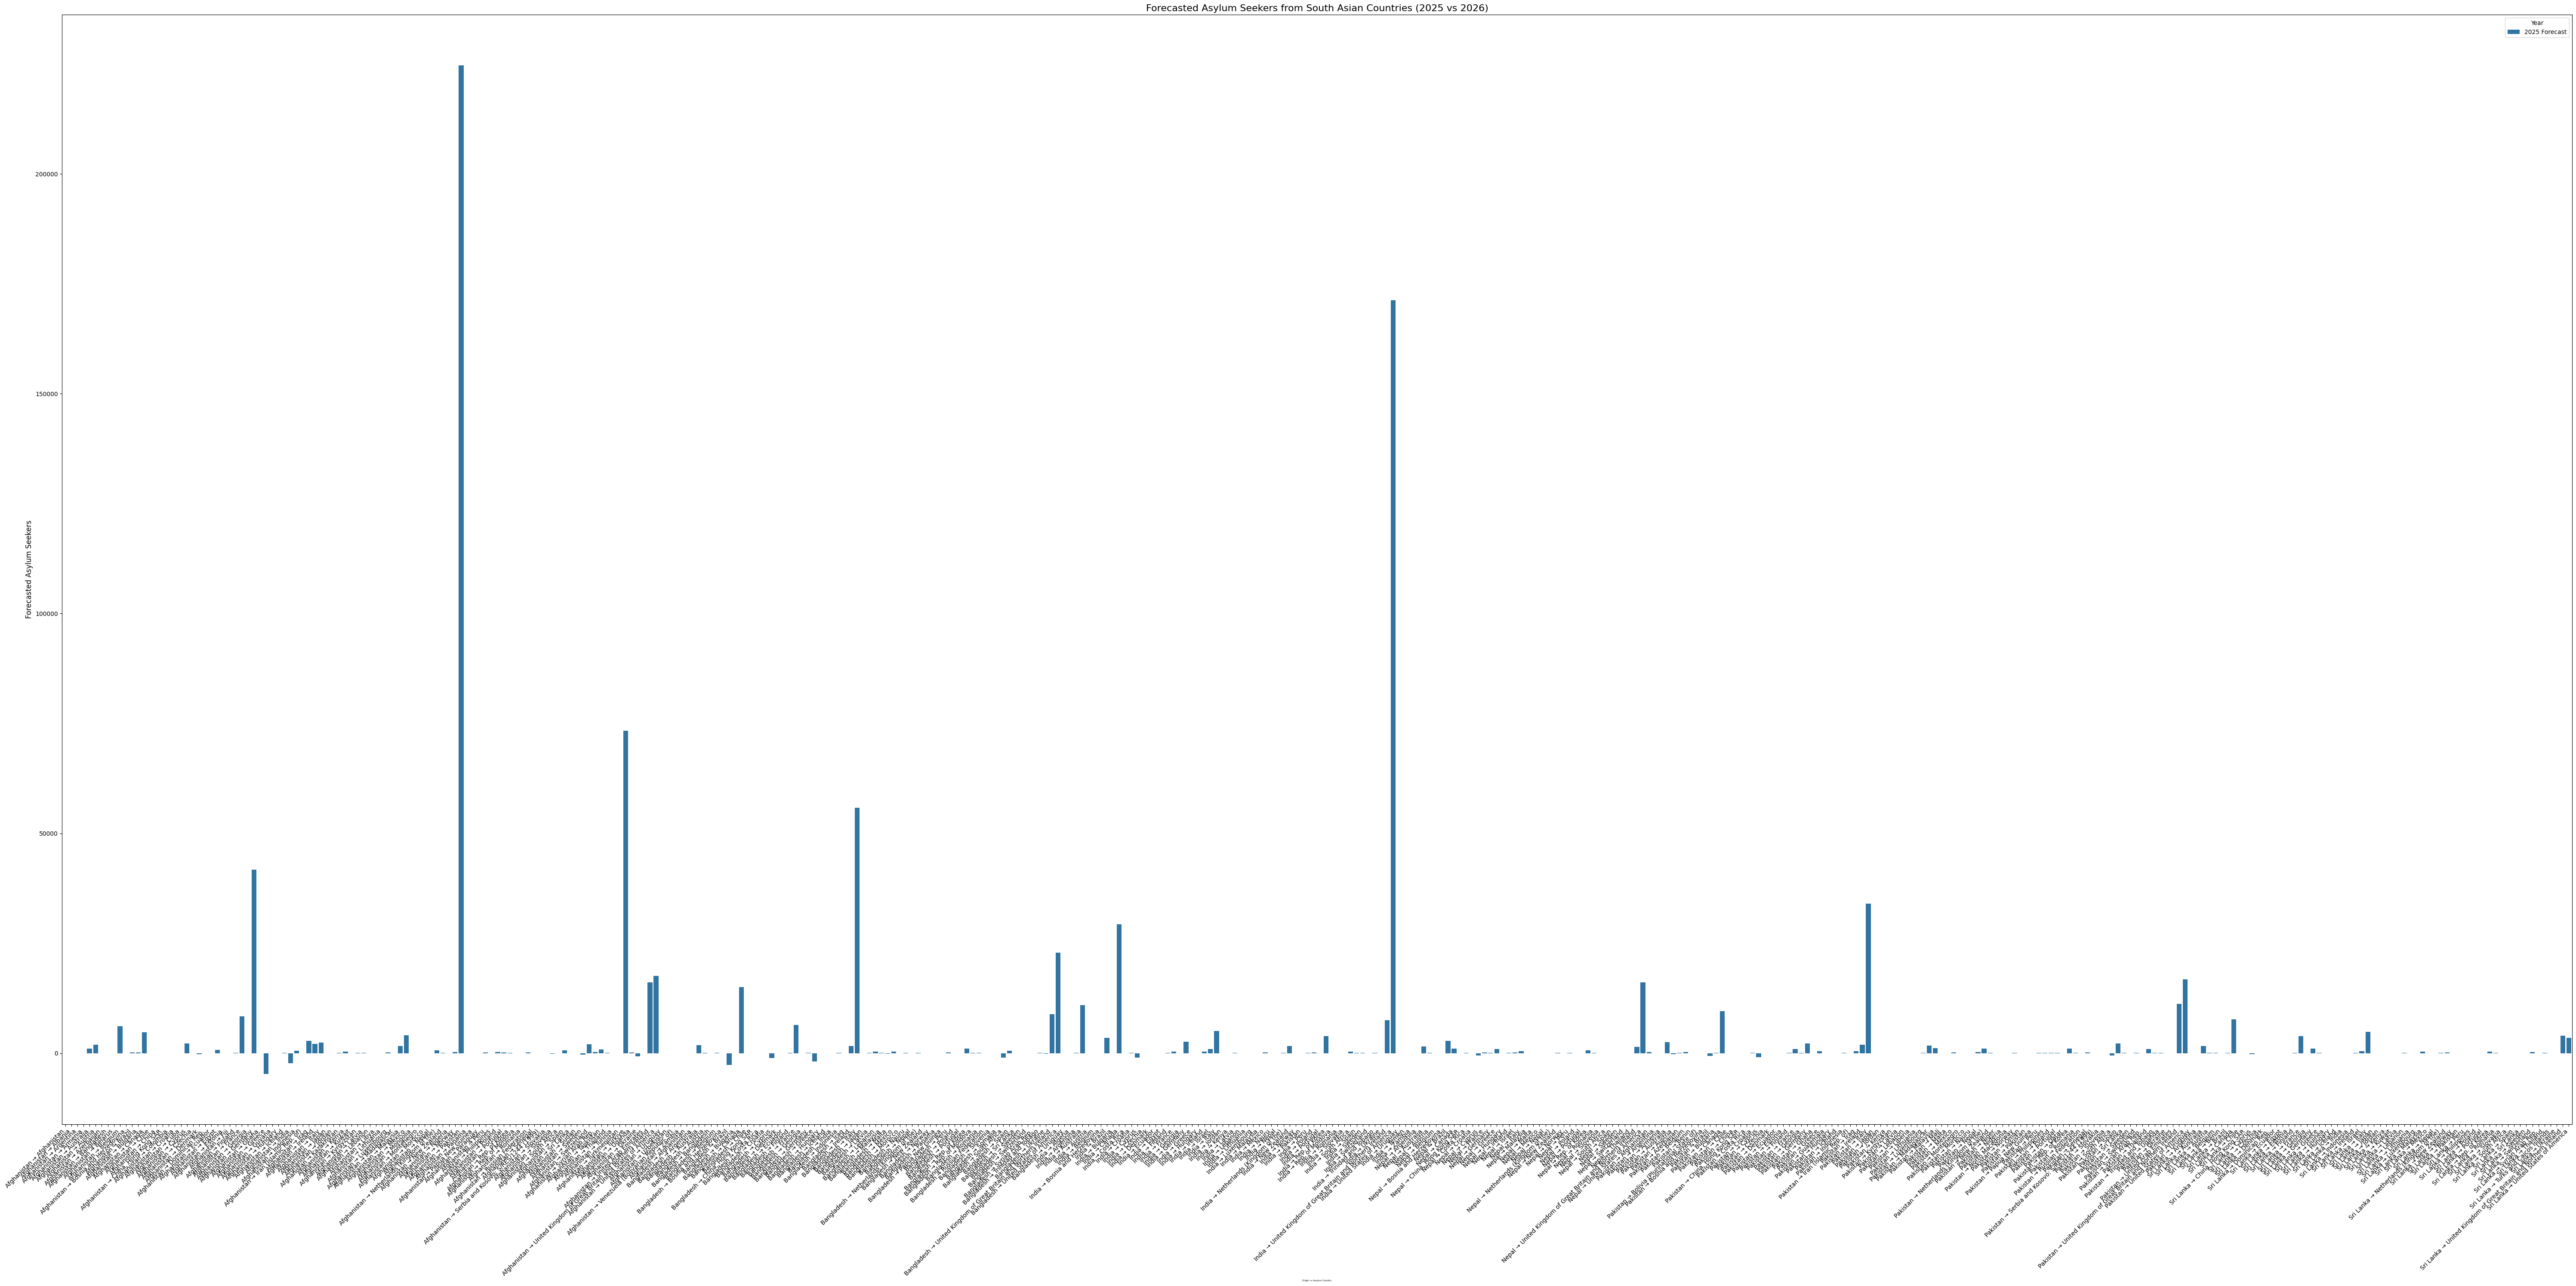

In [ ]:
import seaborn as sns

# Melt the table for easier plotting
table_melted = table.melt(
    id_vars=['Country of Origin', 'Country of Asylum'],
    value_vars=['2025 Forecast'],
    var_name='Year',
    value_name='Forecasted Asylum-seekers'
)

# Create a combined label for each origin-destination pair
table_melted['Route'] = table_melted['Country of Origin'] + ' → ' + table_melted['Country of Asylum']

# Plot the bar chart
plt.figure(figsize=(60, 30))
sns.barplot(data=table_melted, x='Route', y='Forecasted Asylum-seekers', hue='Year')

plt.title('Forecasted Asylum Seekers from South Asian Countries (2025 vs 2026)', fontsize=16)
plt.xlabel('Origin → Asylum Country', fontsize=4)
plt.ylabel('Forecasted Asylum Seekers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjttbjaa/01n9k38_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjttbjaa/zvtdsre_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3555', 'data', 'file=/tmp/tmpsjttbjaa/01n9k38_.json', 'init=/tmp/tmpsjttbjaa/zvtdsre_.json', 'output', 'file=/tmp/tmpsjttb

    Country of Origin                                  Country of Asylum  \
0         Afghanistan                                        Afghanistan   
1         Afghanistan                                            Albania   
2         Afghanistan                                          Argentina   
3         Afghanistan                                            Armenia   
4         Afghanistan                                          Australia   
..                ...                                                ...   
417         Sri Lanka                                           Thailand   
418         Sri Lanka                           Turks and Caicos Islands   
419         Sri Lanka                                            Ukraine   
420         Sri Lanka  United Kingdom of Great Britain and Northern I...   
421         Sri Lanka                           United States of America   

     2025 Forecast  2026 Forecast  
0                0              0  
1              

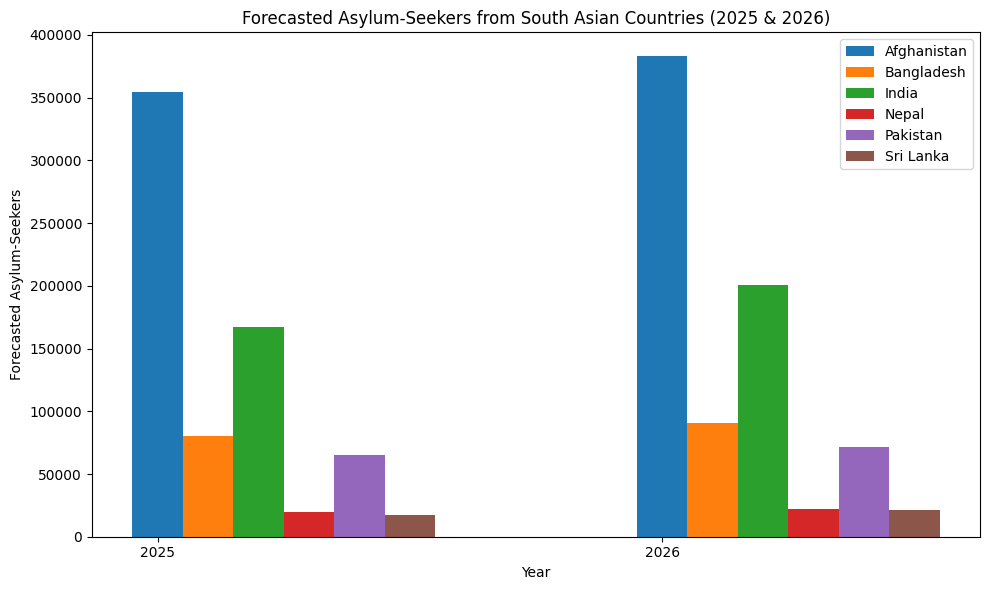

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# South Asian countries list
south_asian_countries = ['Afghanistan', 'Bangladesh', 'India', 'Nepal', 'Pakistan', 'Sri Lanka']

# Filter data for South Asian countries
df_filtered = df[df['Country of origin'].isin(south_asian_countries)]

# Aggregate asylum-seekers by year, origin, and asylum country
df_grouped = df_filtered.groupby(['Year', 'Country of origin', 'Country of asylum'])['Asylum-seekers'].sum().reset_index()

# Run forecasts
forecast_results = []

for country in south_asian_countries:
    country_df = df_grouped[df_grouped['Country of origin'] == country]
    asylum_destinations = country_df['Country of asylum'].unique()

    for asylum_country in asylum_destinations:
        sub_df = country_df[country_df['Country of asylum'] == asylum_country]

        if len(sub_df) >= 3:
            prophet_df = sub_df[['Year', 'Asylum-seekers']].rename(columns={'Year': 'ds', 'Asylum-seekers': 'y'})
            prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

            model = Prophet(yearly_seasonality=True)
            model.fit(prophet_df)

            # Use YS to generate Jan 1 dates to avoid 12/31 confusion
            future = model.make_future_dataframe(periods=2, freq='YS')
            forecast = model.predict(future)

            forecast['Country of Origin'] = country
            forecast['Country of Asylum'] = asylum_country
            forecast_results.append(forecast[['ds', 'yhat', 'Country of Origin', 'Country of Asylum']])

# Combine forecasts
all_forecasts_df = pd.concat(forecast_results)

# Normalize 'Year' column
all_forecasts_df['Year'] = all_forecasts_df['ds'].dt.year

# Filter for 2025 & 2026 only
forecast_2025_2026 = all_forecasts_df[all_forecasts_df['Year'].isin([2025, 2026])].copy()

# Pivot, fill missing forecasts with 0, then convert to int
table = forecast_2025_2026.pivot_table(
    index=['Country of Origin', 'Country of Asylum'],
    columns='Year',
    values='yhat'
).fillna(0).round().astype(int).reset_index()


# Rename columns
table.columns.name = None
table = table.rename(columns={2025: '2025 Forecast', 2026: '2026 Forecast'})

# Display the forecast table
print(table)

# Bar chart visualization (total by origin country)
summary = forecast_2025_2026.groupby(['Country of Origin', 'Year'])['yhat'].sum().reset_index()
summary = summary.round()

# Bar chart
plt.figure(figsize=(10, 6))
for country in south_asian_countries:
    country_data = summary[summary['Country of Origin'] == country]
    plt.bar(
        country_data['Year'] + 0.1 * south_asian_countries.index(country),
        country_data['yhat'],
        width=0.1,
        label=country
    )

plt.title("Forecasted Asylum-Seekers from South Asian Countries (2025 & 2026)")
plt.xlabel("Year")
plt.ylabel("Forecasted Asylum-Seekers")
plt.xticks([2025, 2026])
plt.legend()
plt.tight_layout()
plt.show()


**Random Fores Classifier**



Classification Report (Top Asylum Destinations for South Asian Refugees):
                                                      precision    recall  f1-score   support

                                         Afghanistan       0.00      0.00      0.00         4
                                             Albania       0.00      0.00      0.00         1
                                           Argentina       0.00      0.00      0.00         5
                                             Armenia       0.00      0.00      0.00         3
                                           Australia       0.00      0.00      0.00        11
                                             Austria       0.00      0.00      0.00         7
                                          Azerbaijan       0.00      0.00      0.00         3
                                          Bangladesh       0.00      0.00      0.00         2
                                             Belarus       0.00      0.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


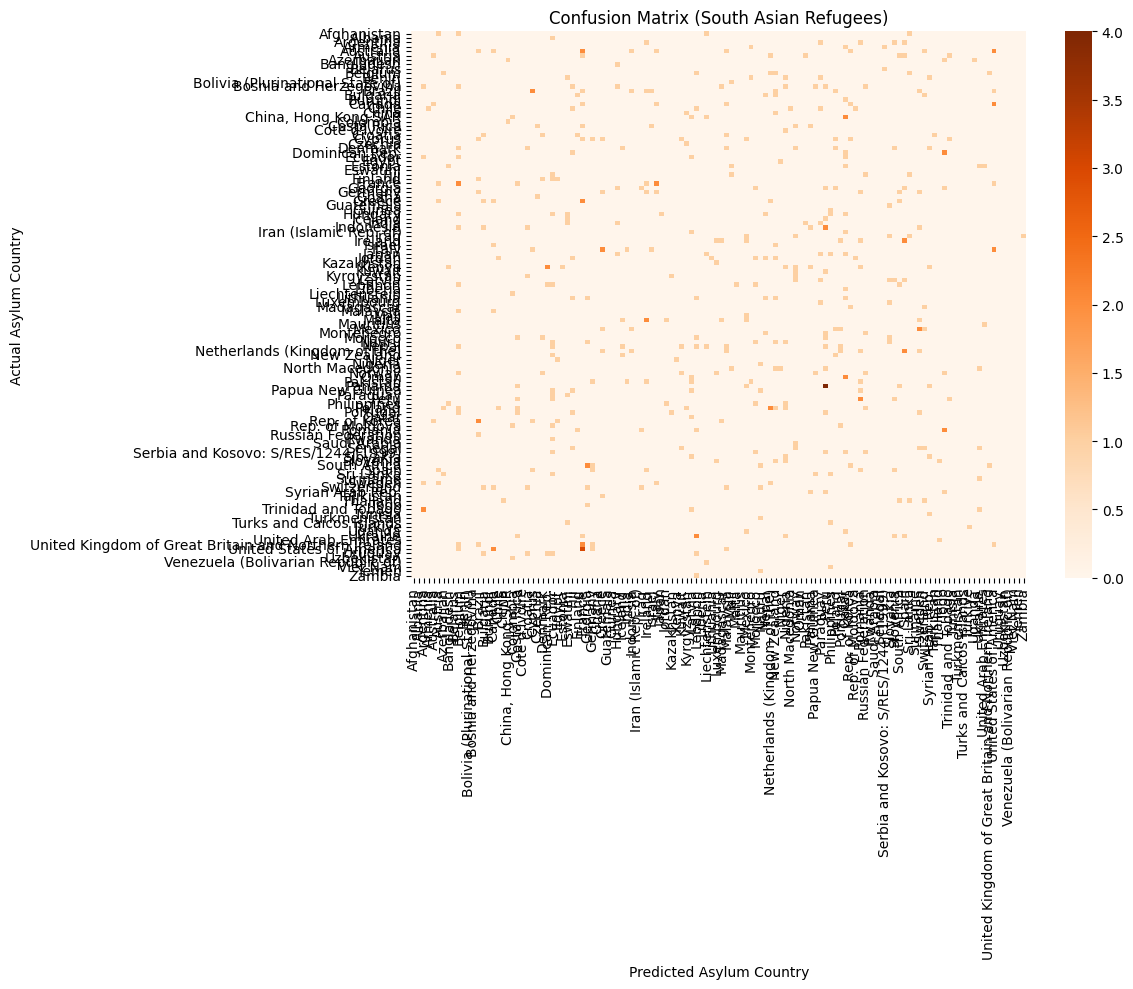

<ipython-input-79-dc7c1bce7cf7>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


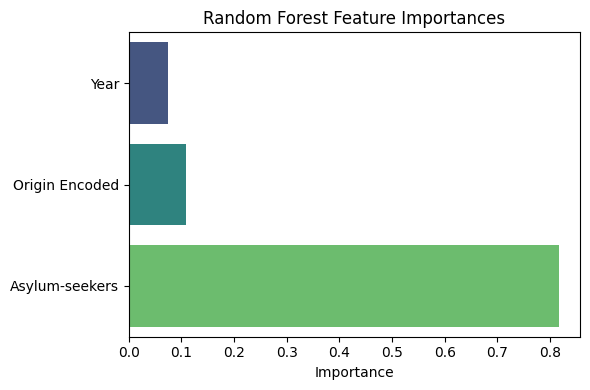

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Filter for South Asian countries
south_asian_countries = ['Afghanistan', 'Bangladesh', 'India', 'Nepal', 'Pakistan', 'Sri Lanka']
df_filtered = df[df['Country of origin'].isin(south_asian_countries)]

# Drop missing values and keep relevant columns
df_filtered = df_filtered[['Year', 'Country of origin', 'Country of asylum', 'Asylum-seekers']].dropna()

# Encode categorical variables
le_origin = LabelEncoder()
le_asylum = LabelEncoder()

df_filtered['origin_encoded'] = le_origin.fit_transform(df_filtered['Country of origin'])
df_filtered['asylum_encoded'] = le_asylum.fit_transform(df_filtered['Country of asylum'])

# Define features and target
X = df_filtered[['Year', 'origin_encoded', 'Asylum-seekers']]
y = df_filtered['asylum_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Align label names with unique test set classes only to avoid mismatch
unique_labels = sorted(y_test.unique())
class_names = le_asylum.inverse_transform(unique_labels)

print("\nClassification Report (Top Asylum Destinations for South Asian Refugees):")
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=class_names, yticklabels=class_names, annot=False, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix (South Asian Refugees)')
plt.xlabel('Predicted Asylum Country')
plt.ylabel('Actual Asylum Country')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_names = ['Year', 'Origin Encoded', 'Asylum-seekers']

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


<ipython-input-1-ee4660a18bfa>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['origin_encoded'] = le_origin.fit_transform(df['Country of origin'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:28:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Accuracy: 0.93
XGBoost Accuracy: 0.94


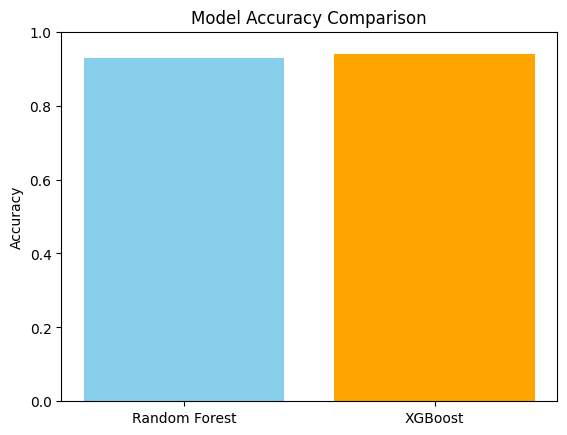

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ✅ Load and filter data
df = pd.read_csv("/content/Refugee_Asylum_data.csv")
south_asian_countries = ['Afghanistan', 'Bangladesh', 'India', 'Nepal', 'Pakistan', 'Sri Lanka']
df = df[df['Country of origin'].isin(south_asian_countries)]

# ✅ Group by origin and asylum
grouped = df.groupby(['Country of origin', 'Country of asylum'])['Asylum-seekers'].sum().reset_index()

# ✅ Get top 5 asylum destinations per country
top5_df = grouped.sort_values(['Country of origin', 'Asylum-seekers'], ascending=[True, False])
top5_df = top5_df.groupby('Country of origin').head(5)

# ✅ Merge to label only top 5 as class, rest as 'Other'
df = df.merge(top5_df[['Country of origin', 'Country of asylum']],
              on=['Country of origin', 'Country of asylum'],
              how='left', indicator=True)

df['label'] = df.apply(lambda x: x['Country of asylum'] if x['_merge'] == 'both' else 'Other', axis=1)

# ✅ Prepare features
features = df[['Year', 'Asylum-seekers']]
le_origin = LabelEncoder()
le_asylum = LabelEncoder()

features['origin_encoded'] = le_origin.fit_transform(df['Country of origin'])
X = features
y = le_asylum.fit_transform(df['label'])

# ✅ Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# ✅ Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

# ✅ Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

# ✅ Compare accuracies
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

# ✅ Visualize accuracy comparison
plt.bar(['Random Forest', 'XGBoost'], [rf_accuracy, xgb_accuracy], color=['skyblue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()


<ipython-input-5-de614498acf1>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_forecast[col].fillna(median_val, inplace=True)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:37:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Comparison of Top 5 Asylum Destinations for South Asian Countries (XGBoost vs Random Forest)
         Origin  Rank                                XGBoost_Destination  \
0   Afghanistan     1                             Bosnia and Herzegovina   
1   Afghanistan     2                                            Finland   
2   Afghanistan     3                                             Panama   
3   Afghanistan     4                                           Bulgaria   
4   Afghanistan     5                                            Uruguay   
5      Pakistan     1                                            Austria   
6      Pakistan     2                                             Canada   
7      Pakistan     3                                            Belgium   
8      Pakistan     4                                              Spain   
9      Pakistan     5                                       South Africa   
10   Bangladesh     1                                             Cana

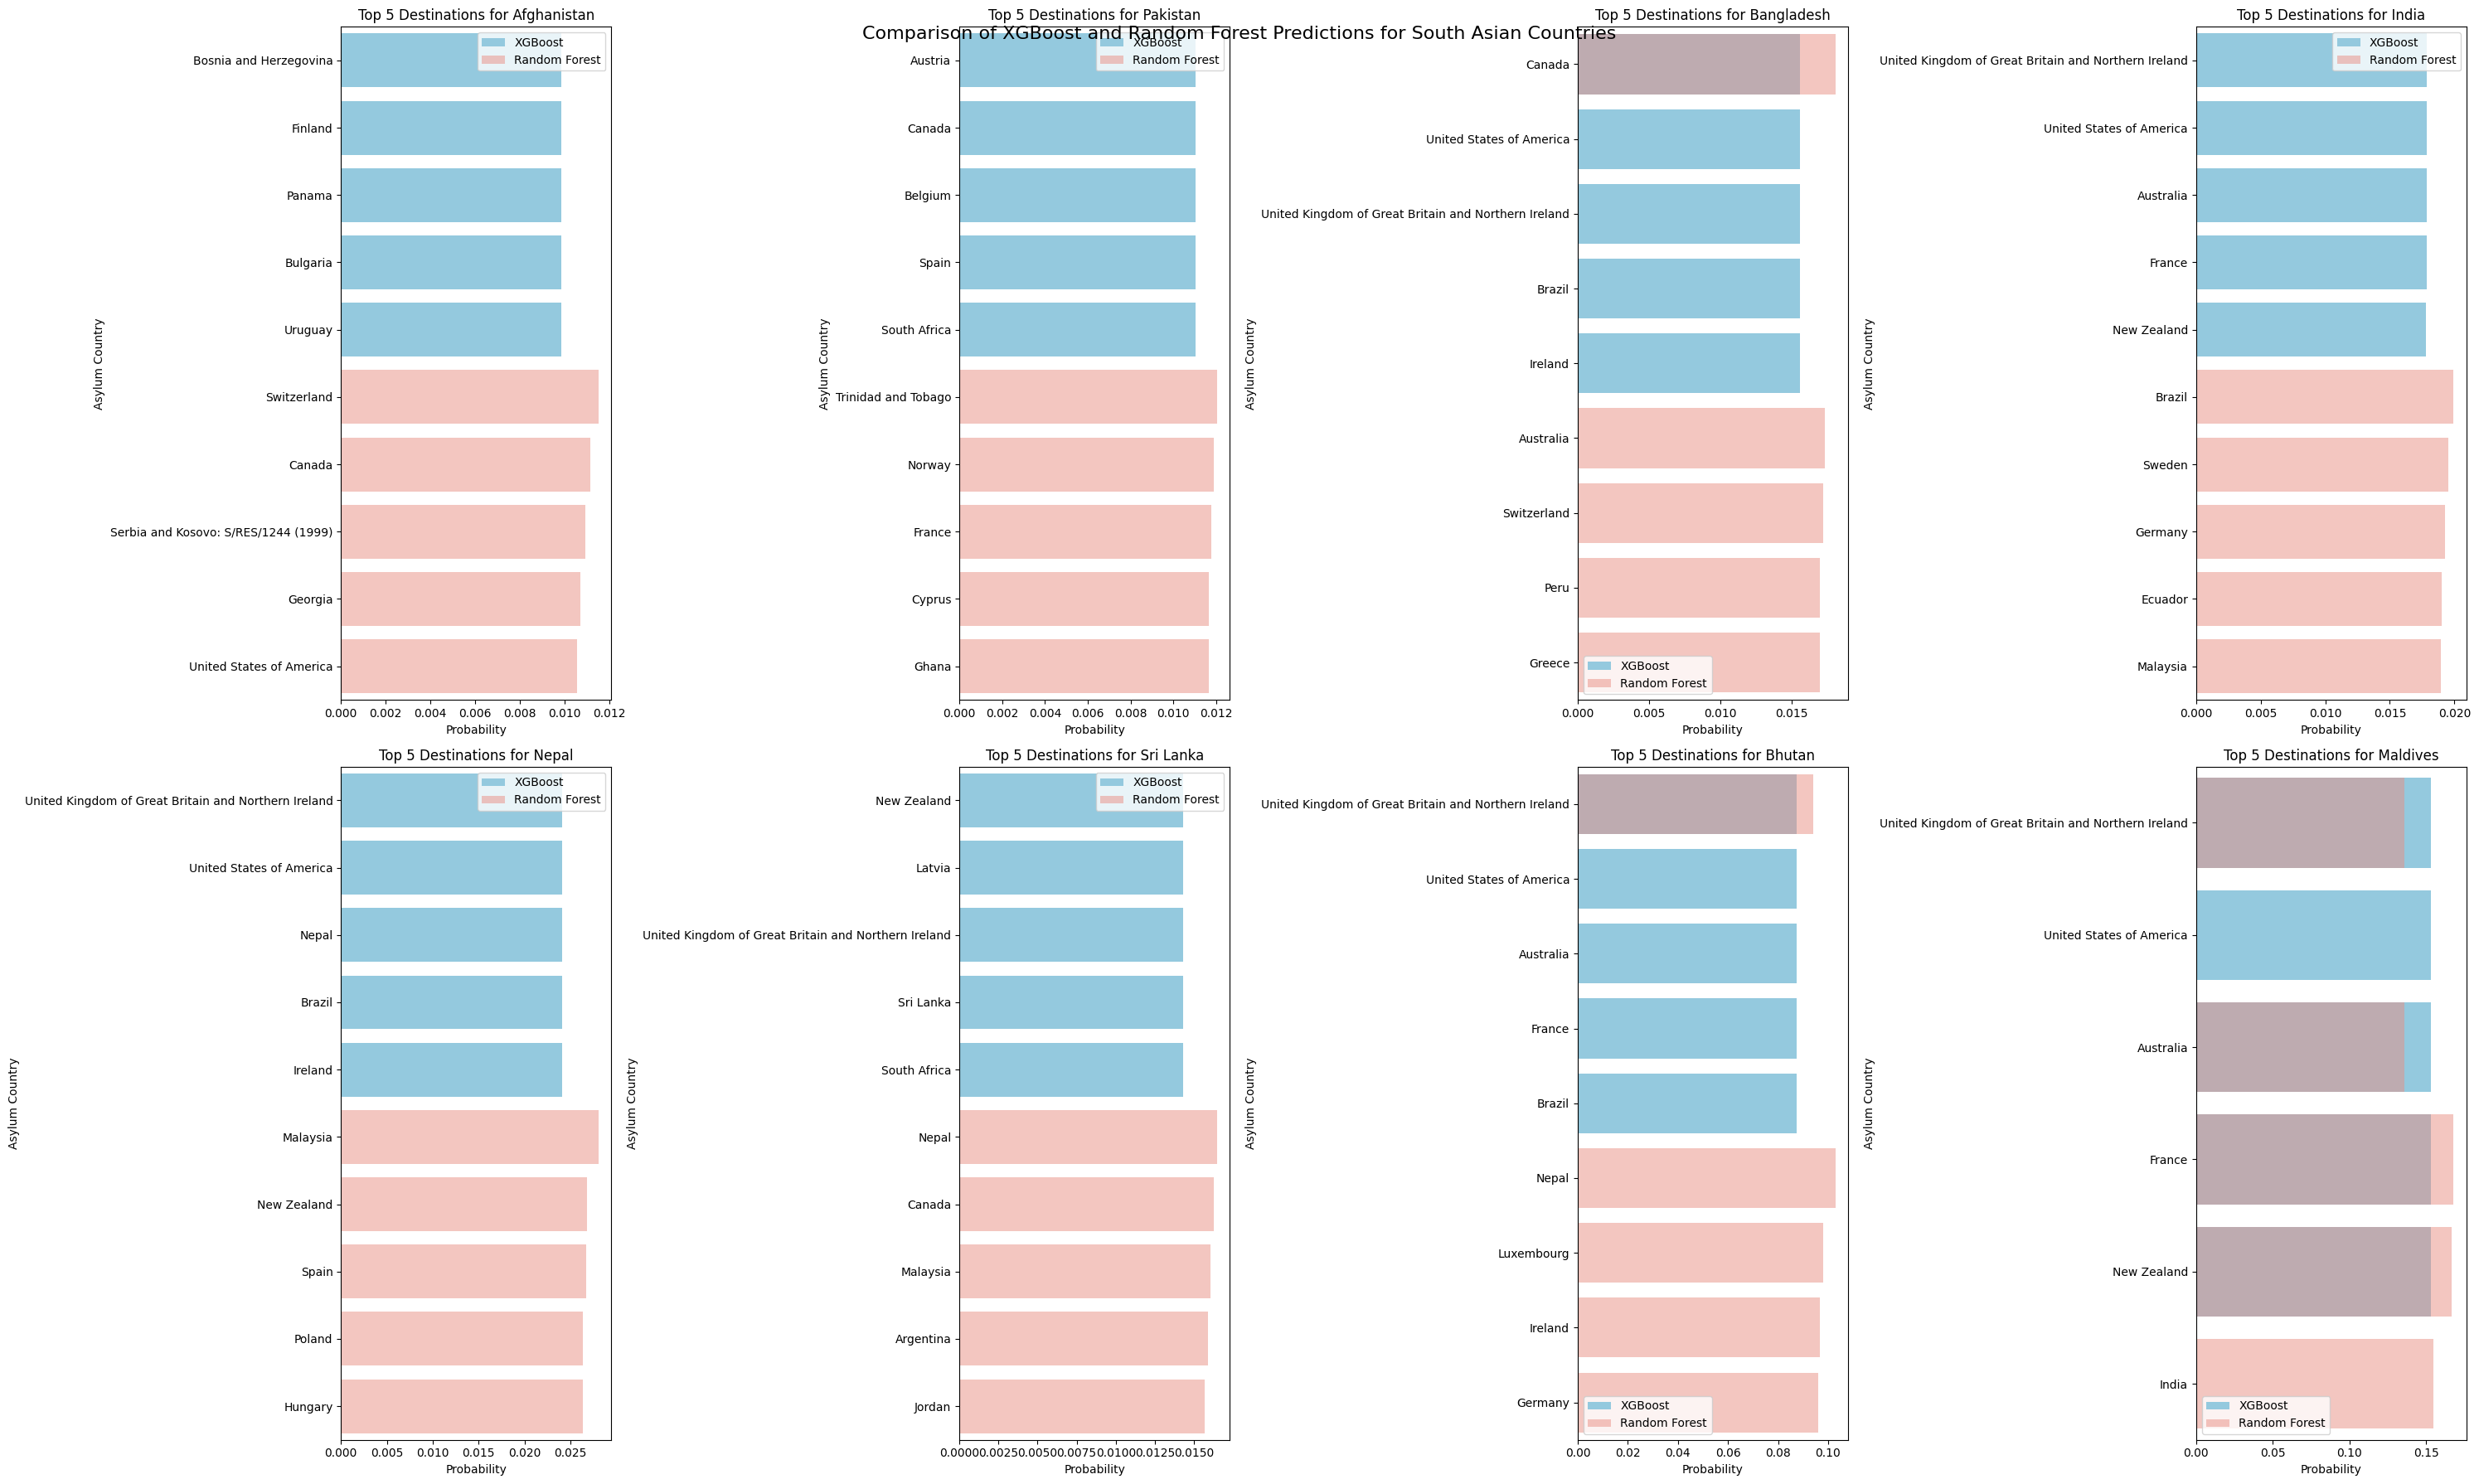

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("/content/Refugee_Asylum_data.csv")

# South Asian countries
south_asian_countries = [
    "Afghanistan", "Pakistan", "Bangladesh", "India",
    "Nepal", "Sri Lanka", "Bhutan", "Maldives"
]

# Filter for South Asian countries
df_filtered = df[df['Country of origin'].isin(south_asian_countries)].copy()

# Drop columns with high missing values (as in original code)
df_filtered = df_filtered.drop(columns=[
    'IDPs of concern to UNHCR', 'Others of concern', 'Returned IDPss',
    'Stateless persons', 'Returned refugees', 'Host Community',
    'Other people in need of international protection'
], errors='ignore')

# Rename columns
df_filtered = df_filtered.rename(columns={
    "Country of origin": "Origin",
    "Country of asylum": "Asylum",
    "Refugees under UNHCR's mandate": "Refugees_UNHCR",
    "Asylum-seekers": "AsylumSeekers"
})

# Select relevant columns
df_forecast = df_filtered[["Year", "Origin", "Asylum", "Refugees_UNHCR", "AsylumSeekers"]].copy()

# Handle missing values (replace 0 with NaN for numeric columns, then impute with median)
numeric_cols = df_forecast.select_dtypes(include=np.number).columns
df_forecast[numeric_cols] = df_forecast[numeric_cols].replace(0, np.nan)
for col in numeric_cols:
    median_val = df_forecast[col].median()
    df_forecast[col].fillna(median_val, inplace=True)

# Encode categorical variables
le_origin = LabelEncoder()
le_asylum = LabelEncoder()
df_forecast['Origin_encoded'] = le_origin.fit_transform(df_forecast['Origin'])
df_forecast['Asylum_encoded'] = le_asylum.fit_transform(df_forecast['Asylum'])

# Prepare data for models
# XGBoost: Use Year, Origin_encoded
X_xgb = df_forecast[['Year', 'Origin_encoded']]
y_xgb = df_forecast['Asylum_encoded']

# Random Forest: Use Year, Origin_encoded, AsylumSeekers
X_rf = df_forecast[['Year', 'Origin_encoded', 'AsylumSeekers']]
y_rf = df_forecast['Asylum_encoded']

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_xgb, y_xgb)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_rf, y_rf)

# Function to get top 5 asylum destinations for a given origin
def get_top_5_destinations(model, X, le_origin, le_asylum, origin_name, features):
    # Filter data for the specific origin
    origin_encoded = le_origin.transform([origin_name])[0]
    if 'AsylumSeekers' in features:
        X_origin = X[(X['Origin_encoded'] == origin_encoded)][features]
    else:
        X_origin = X[(X['Origin_encoded'] == origin_encoded)][features]

    if X_origin.empty:
        return pd.DataFrame({'Asylum': [], 'Probability': []})

    # Predict probabilities
    probs = model.predict_proba(X_origin)
    # Average probabilities across years
    avg_probs = np.mean(probs, axis=0)
    # Get top 5 indices
    top_5_indices = np.argsort(avg_probs)[::-1][:5]
    # Convert to country names and probabilities
    top_5_countries = le_asylum.inverse_transform(top_5_indices)
    top_5_probs = avg_probs[top_5_indices]

    return pd.DataFrame({
        'Asylum': top_5_countries,
        'Probability': top_5_probs
    })

# Generate comparison table
comparison_data = []
for origin in south_asian_countries:
    # Get top 5 for XGBoost
    xgb_top_5 = get_top_5_destinations(xgb_model, X_xgb, le_origin, le_asylum, origin, ['Year', 'Origin_encoded'])
    xgb_top_5['Model'] = 'XGBoost'
    xgb_top_5['Origin'] = origin
    xgb_top_5['Rank'] = range(1, len(xgb_top_5) + 1)

    # Get top 5 for Random Forest
    rf_top_5 = get_top_5_destinations(rf_model, X_rf, le_origin, le_asylum, origin, ['Year', 'Origin_encoded', 'AsylumSeekers'])
    rf_top_5['Model'] = 'Random Forest'
    rf_top_5['Origin'] = origin
    rf_top_5['Rank'] = range(1, len(rf_top_5) + 1)

    # Combine
    comparison_data.append(xgb_top_5)
    comparison_data.append(rf_top_5)

# Create comparison DataFrame
comparison_df = pd.concat(comparison_data, ignore_index=True)

# Pivot to create a readable table
comparison_pivot = comparison_df.pivot_table(
    index=['Origin', 'Model', 'Rank'],
    columns='Asylum',
    values='Probability',
    aggfunc='first'
).reset_index()

# Fill NaN with 0 for display
comparison_pivot = comparison_pivot.fillna(0)

# Create a formatted table for display
formatted_table = []
for origin in south_asian_countries:
    for rank in range(1, 6):
        xgb_row = comparison_df[(comparison_df['Origin'] == origin) &
                                (comparison_df['Model'] == 'XGBoost') &
                                (comparison_df['Rank'] == rank)]
        rf_row = comparison_df[(comparison_df['Origin'] == origin) &
                               (comparison_df['Model'] == 'Random Forest') &
                               (comparison_df['Rank'] == rank)]

        xgb_country = xgb_row['Asylum'].values[0] if not xgb_row.empty else 'N/A'
        xgb_prob = xgb_row['Probability'].values[0] if not xgb_row.empty else 0
        rf_country = rf_row['Asylum'].values[0] if not rf_row.empty else 'N/A'
        rf_prob = rf_row['Probability'].values[0] if not rf_row.empty else 0

        formatted_table.append({
            'Origin': origin,
            'Rank': rank,
            'XGBoost_Destination': xgb_country,
            'XGBoost_Probability': round(xgb_prob, 4),
            'RandomForest_Destination': rf_country,
            'RandomForest_Probability': round(rf_prob, 4)
        })

formatted_df = pd.DataFrame(formatted_table)

# Display the table
print("\nComparison of Top 5 Asylum Destinations for South Asian Countries (XGBoost vs Random Forest)")
print(formatted_df)

# Save table to CSV
formatted_df.to_csv('comparison_xgboost_rf_top5.csv', index=False)

# Visualization: Bar plot for top 5 destinations
plt.figure(figsize=(30, 18))
for origin in south_asian_countries:
    origin_data = comparison_df[comparison_df['Origin'] == origin]
    xgb_data = origin_data[origin_data['Model'] == 'XGBoost']
    rf_data = origin_data[origin_data['Model'] == 'Random Forest']

    plt.subplot(2, 4, south_asian_countries.index(origin) + 1)
    sns.barplot(data=xgb_data, x='Probability', y='Asylum', color='skyblue', label='XGBoost')
    sns.barplot(data=rf_data, x='Probability', y='Asylum', color='salmon', label='Random Forest', alpha=0.5)
    plt.title(f'Top 5 Destinations for {origin}')
    plt.xlabel('Probability')
    plt.ylabel('Asylum Country')
    plt.legend()
    plt.tight_layout()

plt.suptitle('Comparison of XGBoost and Random Forest Predictions for South Asian Countries', fontsize=16)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Loading and preprocessing the dataset
def load_and_preprocess_data():
    # Define South Asian countries
    south_asian_countries = [
        'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
        'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
    ]

    # Load the dataset (assuming CSV format)
    df = pd.read_csv('/content/Refugee_Asylum_data.csv')

    # Filter for South Asian countries of origin
    df_south_asia = df[df['Country of origin'].isin(south_asian_countries)]

    # Handle missing and non-numeric values in numerical columns
    numerical_cols = [
        'Refugees under UNHCR\'s mandate', 'Asylum-seekers',
        'Returned refugees', 'IDPs of concern to UNHCR',
        'Returned IDPss', 'Stateless persons',
        'Other people in need of international protection'
    ]
    for col in numerical_cols:
        # Convert to numeric, coercing invalid values to NaN
        df_south_asia[col] = pd.to_numeric(df_south_asia[col], errors='coerce')
        # Replace NaN and inf with 0
        df_south_asia[col] = df_south_asia[col].replace([np.nan, np.inf, -np.inf], 0)
        # Convert to integer
        df_south_asia[col] = df_south_asia[col].astype(int)

    # Select relevant features and target
    features = ['Year', 'Country of origin',
                'Refugees under UNHCR\'s mandate', 'Asylum-seekers']
    target = 'Country of asylum'

    X = df_south_asia[features]
    y = df_south_asia[target]

    # Encode categorical variables
    le_country_origin = LabelEncoder()
    le_country_asylum = LabelEncoder()
    X['Country of origin'] = le_country_origin.fit_transform(X['Country of origin'])
    y = le_country_asylum.fit_transform(y)

    # Convert Year to integer, handling any potential issues
    X['Year'] = pd.to_numeric(X['Year'], errors='coerce').fillna(0).astype(int)

    # Sample data if too large (e.g., max 10,000 rows)
    if len(X) > 10000:
        X = X.sample(n=10000, random_state=42)
        y = y[X.index]

    return X, y, le_country_asylum

# Hyperparameter tuning
def perform_hyperparameter_tuning(X, y):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Define Random Forest Classifier
    rf = RandomForestClassifier(random_state=42)

    # Define hyperparameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Evaluate on test set
    y_pred = grid_search.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    return grid_search, test_accuracy

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    X, y, le_country_asylum = load_and_preprocess_data()

    # Perform hyperparameter tuning
    grid_search, test_accuracy = perform_hyperparameter_tuning(X, y)

    # Output results
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Cross-Validation Accuracy:", grid_search.best_score_)
    print("Test Set Accuracy:", test_accuracy)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.32216981132075473
Test Set Accuracy: 0.3220338983050847


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best XGBoost Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best XGBoost CV Accuracy: nan
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest CV Accuracy: 0.055441850548981986

Comparison of Top 5 Asylum Destinations for South Asian Countries (XGBoost vs Random Forest)
         Origin  Rank                                XGBoost_Destination  \
0   Afghanistan     1                           United States of America   
1   Afghanistan     2                                          Australia   
2   Afghanistan     3                                              Chile   
3   Afghanistan     4                                            Belgium   
4   Afghanistan     5                                       South Africa   
5      Pakis

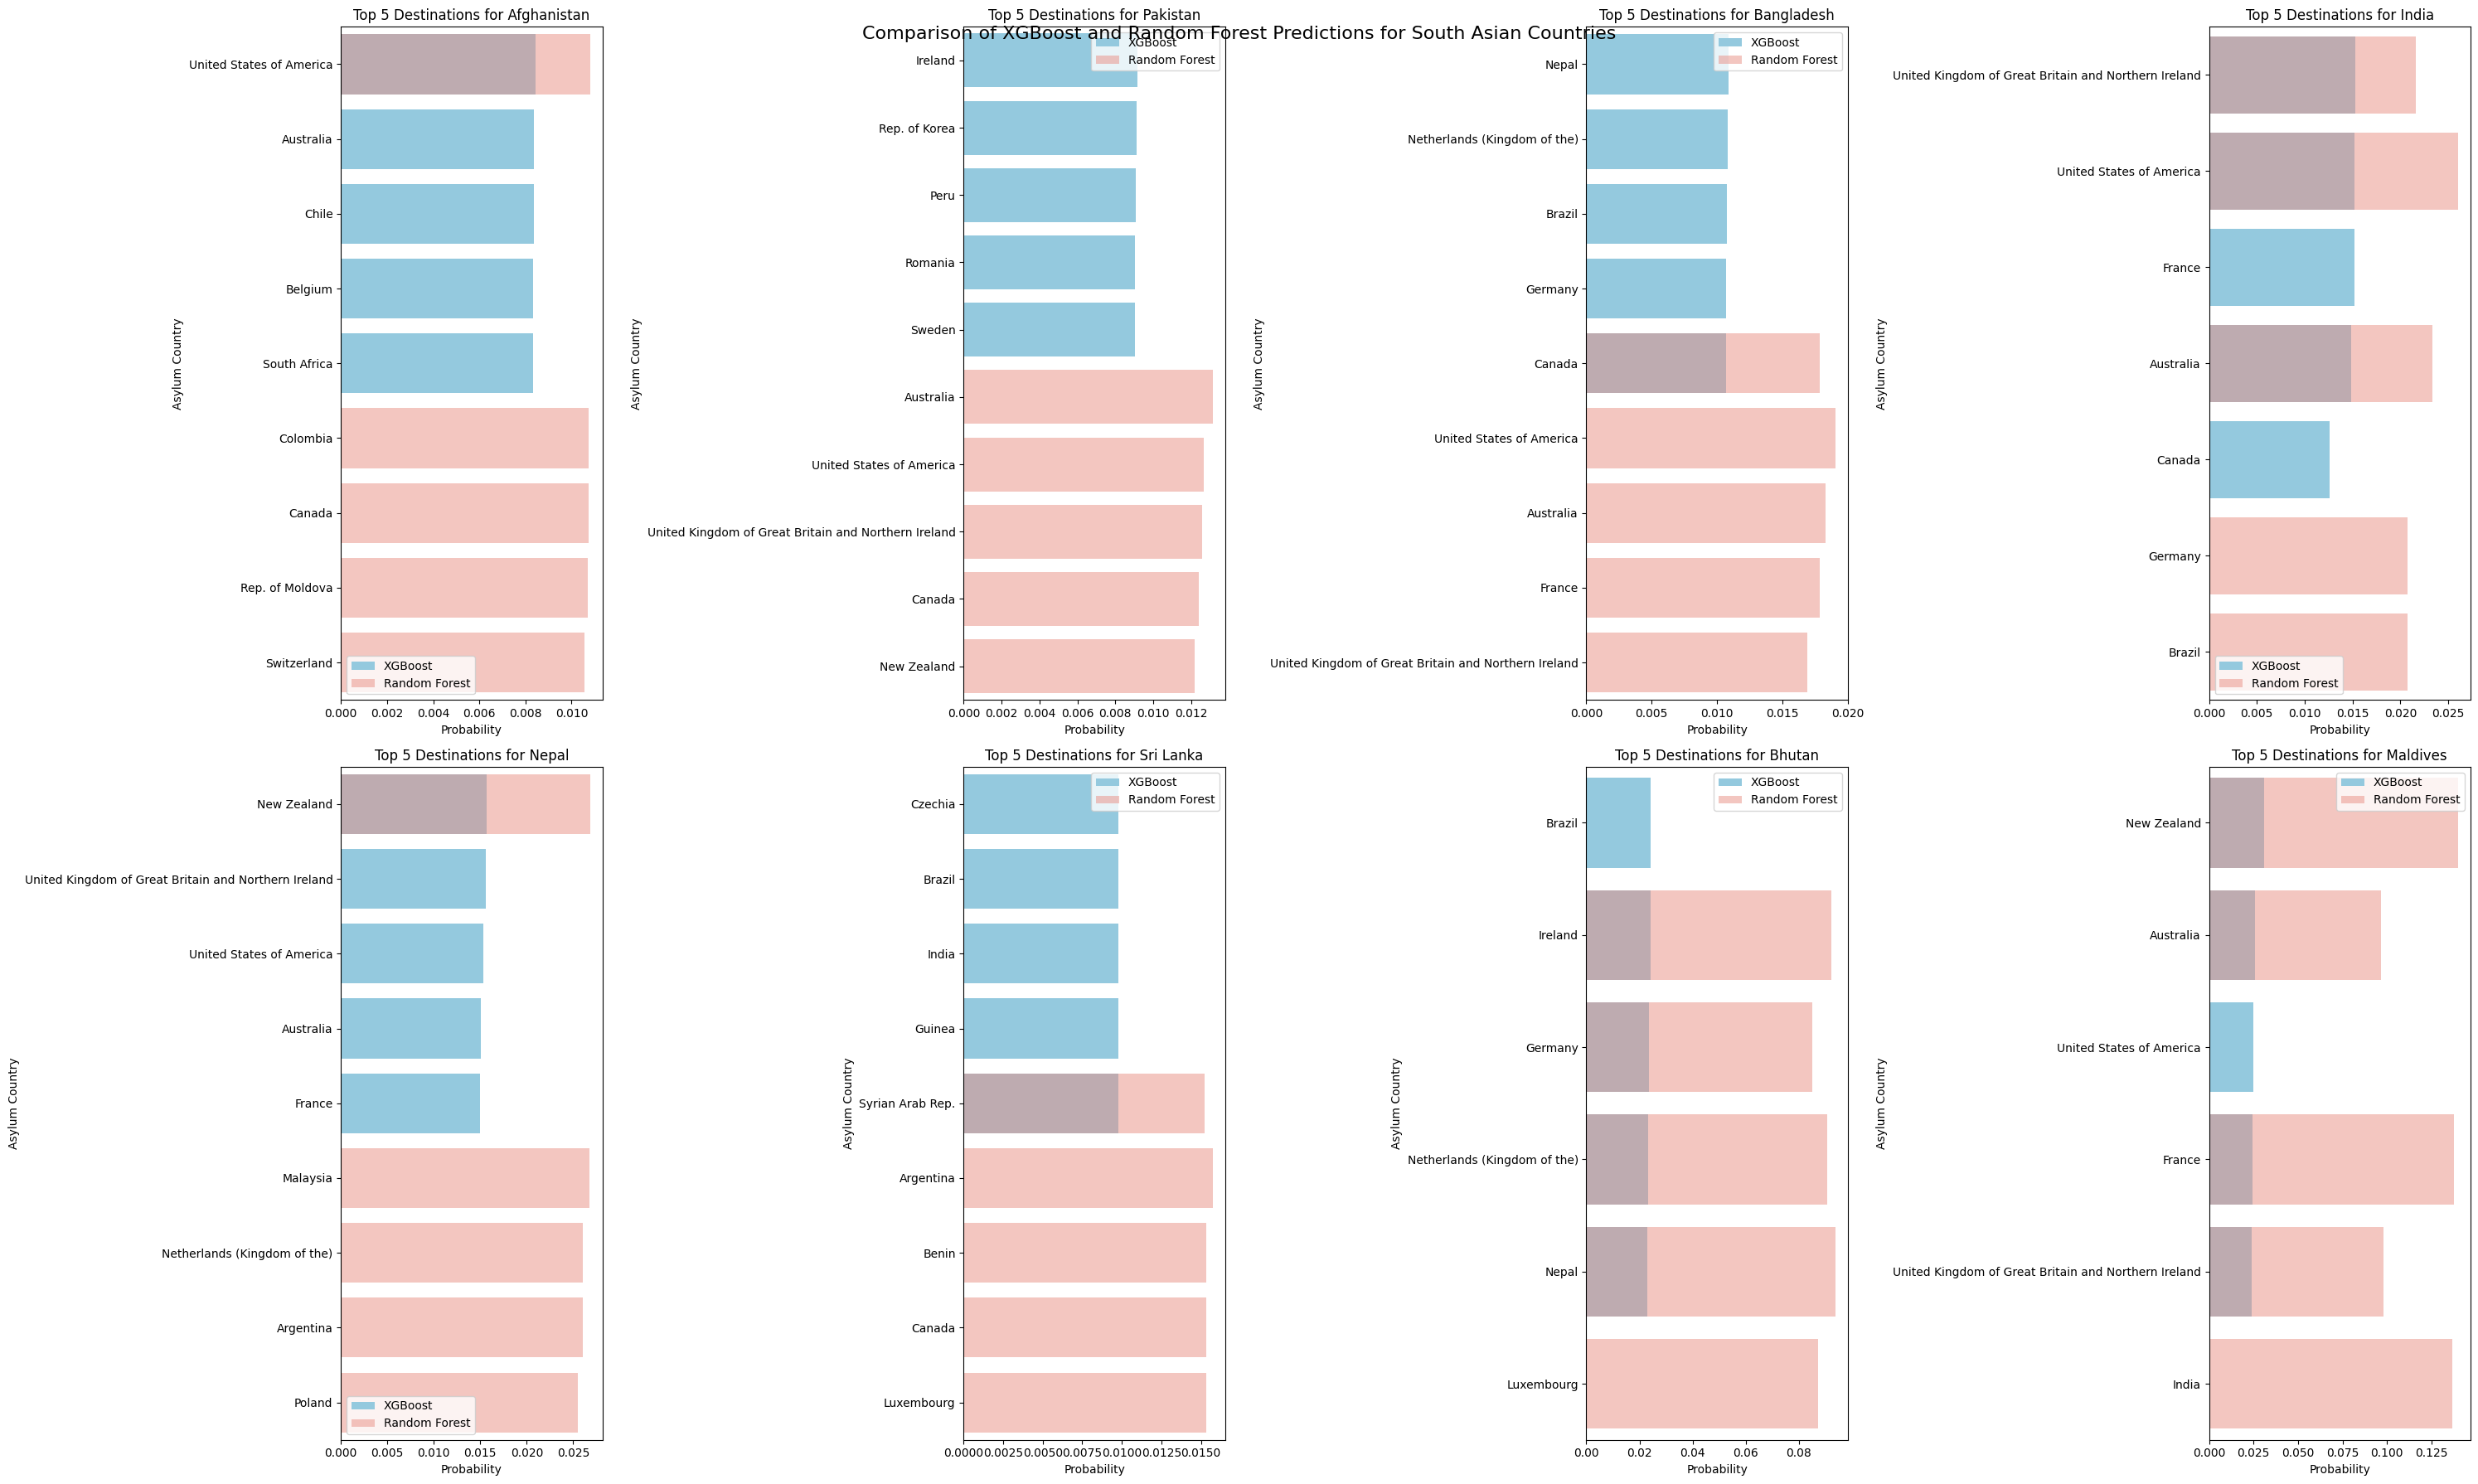

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_csv("/content/Refugee_Asylum_data.csv")

# South Asian countries
south_asian_countries = [
    "Afghanistan", "Pakistan", "Bangladesh", "India",
    "Nepal", "Sri Lanka", "Bhutan", "Maldives"
]

# Filter for South Asian countries
df_filtered = df[df['Country of origin'].isin(south_asian_countries)].copy()

# Drop columns with high missing values (as in original code)
df_filtered = df_filtered.drop(columns=[
    'IDPs of concern to UNHCR', 'Others of concern', 'Returned IDPss',
    'Stateless persons', 'Returned refugees', 'Host Community',
    'Other people in need of international protection'
], errors='ignore')

# Rename columns
df_filtered = df_filtered.rename(columns={
    "Country of origin": "Origin",
    "Country of asylum": "Asylum",
    "Refugees under UNHCR's mandate": "Refugees_UNHCR",
    "Asylum-seekers": "AsylumSeekers"
})

# Select relevant columns
df_forecast = df_filtered[["Year", "Origin", "Asylum", "Refugees_UNHCR", "AsylumSeekers"]].copy()

# Handle missing values (replace 0 with NaN for numeric columns, then impute with median)
numeric_cols = df_forecast.select_dtypes(include=np.number).columns
df_forecast[numeric_cols] = df_forecast[numeric_cols].replace(0, np.nan)
for col in numeric_cols:
    median_val = df_forecast[col].median()
    df_forecast[col].fillna(median_val, inplace=True)

# Encode categorical variables
le_origin = LabelEncoder()
le_asylum = LabelEncoder()
df_forecast['Origin_encoded'] = le_origin.fit_transform(df_forecast['Origin'])
df_forecast['Asylum_encoded'] = le_asylum.fit_transform(df_forecast['Asylum'])

# Prepare data for models
# XGBoost: Use Year, Origin_encoded
X_xgb = df_forecast[['Year', 'Origin_encoded']]
y_xgb = df_forecast['Asylum_encoded']

# Random Forest: Use Year, Origin_encoded, AsylumSeekers
X_rf = df_forecast[['Year', 'Origin_encoded', 'AsylumSeekers']]
y_rf = df_forecast['Asylum_encoded']

# Define hyperparameter grids
xgb_param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Train XGBoost model with hyperparameter tuning
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
xgb_grid_search.fit(X_xgb, y_xgb)
xgb_model = xgb_grid_search.best_estimator_
print("Best XGBoost Hyperparameters:", xgb_grid_search.best_params_)
print("Best XGBoost CV Accuracy:", xgb_grid_search.best_score_)

# Train Random Forest model with hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
rf_grid_search.fit(X_rf, y_rf)
rf_model = rf_grid_search.best_estimator_
print("Best Random Forest Hyperparameters:", rf_grid_search.best_params_)
print("Best Random Forest CV Accuracy:", rf_grid_search.best_score_)

# Function to get top 5 asylum destinations for a given origin
def get_top_5_destinations(model, X, le_origin, le_asylum, origin_name, features):
    # Filter data for the specific origin
    origin_encoded = le_origin.transform([origin_name])[0]
    if 'AsylumSeekers' in features:
        X_origin = X[(X['Origin_encoded'] == origin_encoded)][features]
    else:
        X_origin = X[(X['Origin_encoded'] == origin_encoded)][features]

    if X_origin.empty:
        return pd.DataFrame({'Asylum': [], 'Probability': []})

    # Predict probabilities
    probs = model.predict_proba(X_origin)
    # Average probabilities across years
    avg_probs = np.mean(probs, axis=0)
    # Get top 5 indices
    top_5_indices = np.argsort(avg_probs)[::-1][:5]
    # Convert to country names and probabilities
    top_5_countries = le_asylum.inverse_transform(top_5_indices)
    top_5_probs = avg_probs[top_5_indices]

    return pd.DataFrame({
        'Asylum': top_5_countries,
        'Probability': top_5_probs
    })

# Generate comparison table
comparison_data = []
for origin in south_asian_countries:
    # Get top 5 for XGBoost
    xgb_top_5 = get_top_5_destinations(xgb_model, X_xgb, le_origin, le_asylum, origin, ['Year', 'Origin_encoded'])
    xgb_top_5['Model'] = 'XGBoost'
    xgb_top_5['Origin'] = origin
    xgb_top_5['Rank'] = range(1, len(xgb_top_5) + 1)

    # Get top 5 for Random Forest
    rf_top_5 = get_top_5_destinations(rf_model, X_rf, le_origin, le_asylum, origin, ['Year', 'Origin_encoded', 'AsylumSeekers'])
    rf_top_5['Model'] = 'Random Forest'
    rf_top_5['Origin'] = origin
    rf_top_5['Rank'] = range(1, len(rf_top_5) + 1)

    # Combine
    comparison_data.append(xgb_top_5)
    comparison_data.append(rf_top_5)

# Create comparison DataFrame
comparison_df = pd.concat(comparison_data, ignore_index=True)

# Pivot to create a readable table
comparison_pivot = comparison_df.pivot_table(
    index=['Origin', 'Model', 'Rank'],
    columns='Asylum',
    values='Probability',
    aggfunc='first'
).reset_index()

# Fill NaN with 0 for display
comparison_pivot = comparison_pivot.fillna(0)

# Create a formatted table for display
formatted_table = []
for origin in south_asian_countries:
    for rank in range(1, 6):
        xgb_row = comparison_df[(comparison_df['Origin'] == origin) &
                                (comparison_df['Model'] == 'XGBoost') &
                                (comparison_df['Rank'] == rank)]
        rf_row = comparison_df[(comparison_df['Origin'] == origin) &
                               (comparison_df['Model'] == 'Random Forest') &
                               (comparison_df['Rank'] == rank)]

        xgb_country = xgb_row['Asylum'].values[0] if not xgb_row.empty else 'N/A'
        xgb_prob = xgb_row['Probability'].values[0] if not xgb_row.empty else 0
        rf_country = rf_row['Asylum'].values[0] if not rf_row.empty else 'N/A'
        rf_prob = rf_row['Probability'].values[0] if not rf_row.empty else 0

        formatted_table.append({
            'Origin': origin,
            'Rank': rank,
            'XGBoost_Destination': xgb_country,
            'XGBoost_Probability': round(xgb_prob, 4),
            'RandomForest_Destination': rf_country,
            'RandomForest_Probability': round(rf_prob, 4)
        })

formatted_df = pd.DataFrame(formatted_table)

# Display the table
print("\nComparison of Top 5 Asylum Destinations for South Asian Countries (XGBoost vs Random Forest)")
print(formatted_df)

# Save table to CSV
formatted_df.to_csv('comparison_xgboost_rf_top5.csv', index=False)

# Visualization: Bar plot for top 5 destinations
plt.figure(figsize=(30, 18))
for origin in south_asian_countries:
    origin_data = comparison_df[comparison_df['Origin'] == origin]
    xgb_data = origin_data[origin_data['Model'] == 'XGBoost']
    rf_data = origin_data[origin_data['Model'] == 'Random Forest']

    plt.subplot(2, 4, south_asian_countries.index(origin) + 1)
    sns.barplot(data=xgb_data, x='Probability', y='Asylum', color='skyblue', label='XGBoost')
    sns.barplot(data=rf_data, x='Probability', y='Asylum', color='salmon', label='Random Forest', alpha=0.5)
    plt.title(f'Top 5 Destinations for {origin}')
    plt.xlabel('Probability')
    plt.ylabel('Asylum Country')
    plt.legend()
    plt.tight_layout()

plt.suptitle('Comparison of XGBoost and Random Forest Predictions for South Asian Countries', fontsize=16)
plt.show()
